# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from matplotlib.ticker import FuncFormatter
import shap # explain models
from skopt import BayesSearchCV # try this also as per mentor session, it takes additional time to process so going to remove all code
from skopt.plots import plot_convergence

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

## Loading the dataset

In [2]:
data = pd.read_csv("bankchurners.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
df = data.copy() # copy data just in case data got messed up during analysis

<span style="color:blue">
<h3>Some Initial Observations<h3>
<ul>
<li>Clientnum is account no and should not have any predictive power (they could be correlated to age of the account, meaning loyal customers)</li>
<li>Attrition_Flag, Gender, Education_Level, Martial_Status,Income_Category, Card_Category seems to be have text, and seem to be categorical</li>
<li>Attrition_Flag is our target variable</li>
<li>On numeric front, scale of numbers are different, Credit_Limit is in 1000s where as Total_Amt_Chng_Q4_Q1 seem to be in percentage</li> 
<li>Avg_Utilization_Ratio seems to be small fraction</li>
<li>Scaling or normalizing numbers may be requried</li>
<li>Also, I have created functions to avoid repeating code, and I have also added SHAP library plots based on our mentor session</li>
<li>Xgboost also has dependence plots, not implemented for all models to save on space and time for this project</li>
</ul>
</span>

In [4]:
df.head() 

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [5]:
df.tail() 

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [6]:
df["Attrition_Flag"].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<span style="color:blue">
<h3>No Duplicate values<h3>
</span>

In [8]:
df.duplicated().sum()

0

<span style="color:blue">
<h3>Education Level and Marital Status have null/missing values<h3>
</span>

In [9]:
df.isnull().sum() #education level and marital status have null/missing values

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [10]:
df["Income_Category"].unique() #what is abc?

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'abc'], dtype=object)

In [11]:
df[df["Income_Category"] == "abc"] # appears to be uncategorized, this should be imputed

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
19     709327383  Existing Customer            45      F                2   
28     718813833  Existing Customer            44      F                3   
39     708300483  Attrited Customer            66      F                0   
44     720572508  Existing Customer            38      F                4   
58     711427458  Existing Customer            44      F                5   
...          ...                ...           ...    ...              ...   
10021  711149133  Attrited Customer            30      F                1   
10040  714677583  Attrited Customer            50      F                3   
10083  718170033  Existing Customer            42      F                4   
10092  713437008  Attrited Customer            40      F                3   
10119  716893683  Attrited Customer            55      F                3   

      Education_Level Marital_Status Income_Category Card_Category  \
19           Graduate        Married             abc          Blue   
28         Uneducated         Single             abc          Blue   
39          Doctorate        Married             abc          Blue   
44           Graduate         Single             abc          Blue   
58           Graduate        Married             abc          Blue   
...               ...            ...             ...           ...   
10021        Graduate        Married             abc          Blue   
10040       Doctorate         Single             abc          Blue   
10083      Uneducated        Married             abc          Blue   
10092        Graduate        Married             abc          Blue   
10119      Uneducated         Single             abc          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
19                 37                         6                       1   
28                 34                         5                       2   
39                 56                         5                       4   
44                 28                         2                       3   
58                 35                         4                       1   
...               ...                       ...                     ...   
10021              18                         4                       1   
10040              36                         4                       3   
10083              23                         4                       1   
10092              25                         1                       2   
10119              47                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
19                         2     14470.000                 1157   
28                         2     10100.000                    0   
39                         3      7882.000                  605   
44                         3      9830.000                 2055   
58                         2      6273.000                  978   
...                      ...           ...                  ...   
10021                      4      4377.000                 2517   
10040                      3      5173.000                    0   
10083                      2      8348.000                    0   
10092                      3      6888.000                 1878   
10119                      3     14657.000                 2517   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
19           13313.000                 0.966             1207              21   
28           10100.000                 0.525             1052              18   
39            7277.000                 1.052              704              16   
44            7775.000                 0.977             1042              23   
58            5295.000                 2.275             1359              25   
...                ...                   ...     

In [12]:
df["Education_Level"].unique() # we have missing values, just confirming

array(['High School', 'Graduate', 'Uneducated', nan, 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [13]:
df["Marital_Status"].unique() # we have missing values, just confirming

array(['Married', 'Single', nan, 'Divorced'], dtype=object)

In [14]:
def get_nullcounts_values_byColumns(df,colnames):
    """
    function returns a dataframe with one row per col in columns of input df, with null and not null counts in the
    df: input Data frame 
    colnames: limited columns names to return a data frame with null and not null counts
    """
    result_df = pd.DataFrame()
    for colname in colnames:
        null_count = df[colname].isna().sum()
        not_null_count = df[colname].count()
        result = pd.DataFrame({ "colname": [colname],"Null Count": [null_count], "Not Null Count": [not_null_count]})
        result_df = pd.concat([result_df,result],ignore_index=True) # we want new index hence ignore_index, basically all cats should result in seq index
    return result_df
get_nullcounts_values_byColumns(df,["Marital_Status","Education_Level","Attrition_Flag"]) # attrition flag should not nulls,here to verify code

colname  Null Count  Not Null Count
0   Marital_Status         749            9378
1  Education_Level        1519            8608
2   Attrition_Flag           0           10127

In [15]:
df.nunique() # clientnum has same rows as total rows so it must be a account number, also this means one record per customer

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [16]:
print(f"Months customer is on the book Min:{df['Months_on_book'].min()}, Max: {df['Months_on_book'].max()}")

Months customer is on the book Min:13, Max: 56


In [17]:
df["Contacts_Count_12_mon"].unique() # that makes sense these are months 0 to 6 out of 12 months

array([3, 2, 0, 1, 4, 5, 6], dtype=int64)

In [18]:
df["Months_Inactive_12_mon"].unique() # that makes sense these are months 0 to 6 out of 12 months

array([1, 4, 2, 3, 6, 0, 5], dtype=int64)

<span style="color:blue">
<h3>Descriptive Statistics<h3>
<ul>
<li>CLIENTNUM is unique number per client and should be removed</li>
<li>Attrition_Flag is imblanced Existing Customer is majority class</li>
</ul>
</span>

In [19]:
df.describe().T # doing numeric and then object makes the display cleaner

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

<span style="color:blue">
<h3>Descriptive Statistics<h3>
<ul>
<li>Top category Education Level:Graduate,Marital Status: Married,Income:Less Than $40k and Card Category:Blue</li>
</ul>
</span>

In [20]:
df.describe(include=["object"]).T #show only object

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

In [21]:
for col in df.select_dtypes(include=['object']).columns: # find all columns that are object and convert them to category
    df[col] = df[col].astype("category")

In [22]:
df.info(); #check if converted, all category, int and float but we have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

<span style="color:blue">
<h3>Simple Data Clean up<h3>
<ul>
<li>Remove CLIENTNUM</li>
<li>Later replace Class Text with 0 and 1 this is our Target Variable, we will not do this now to get a good chart with description of the class</li>
</ul>
</span>

In [23]:
print(f"Clientnum unique count: {df['CLIENTNUM'].nunique()},Total Rows:{df.shape[0]}") # this is same as total rows

Clientnum unique count: 10127,Total Rows:10127


In [24]:
df.drop("CLIENTNUM",axis=1,inplace=True) 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [25]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [26]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [27]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [29]:
### Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()
    

<span style="color:blue">
<h3>Credit_Limit<h3>
<ul>
<li>It seems lower credit limit leads to higher attrition</li>
<li>Credit Limits have outliers</li>
</ul>
</span>

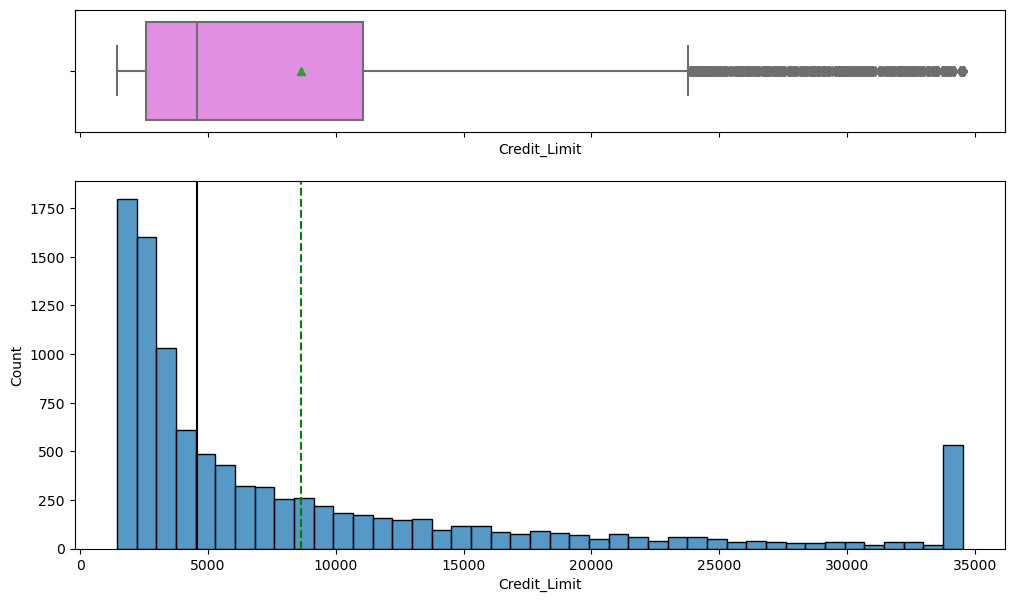

In [30]:
histogram_boxplot(df,"Credit_Limit")

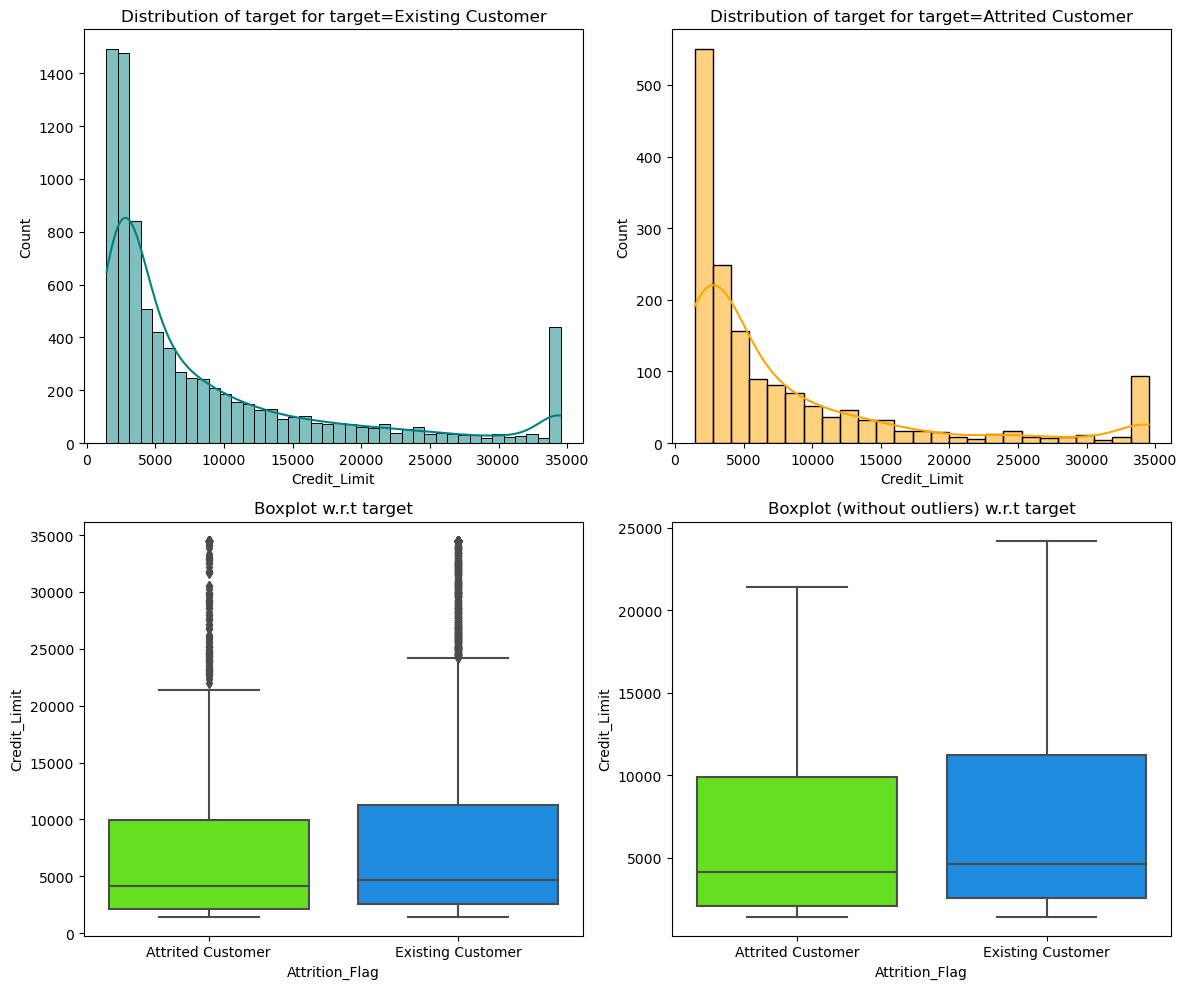

In [31]:
distribution_plot_wrt_target(df,"Credit_Limit","Attrition_Flag")

<span style="color:blue">
<h3>Total_Trans_Amt<h3>
<ul>
<li>Is multi modal (Has Many peaks)</li>
<li>Most Transactions are below 5000, but there seems to be 4 different distributions</li>
</ul>
</span>

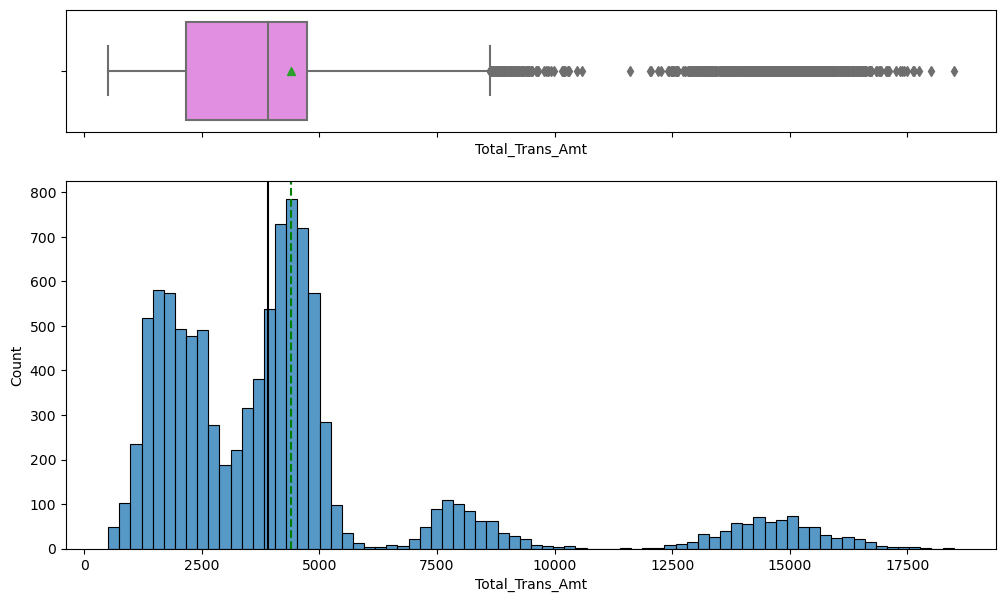

In [32]:
histogram_boxplot(df,"Total_Trans_Amt"); # bi modal distribution

<span style="color:blue">
<h3>Total_Trans_Amt<h3>
<ul>
<li>Is multi modal (Has Many peaks)</li>
<li>Most Transactions are below 5000, but there seems to be 3 different distributions</li>
<li>Lower Total_Tran_Amt leads to Attrition</li>
</ul>
</span>

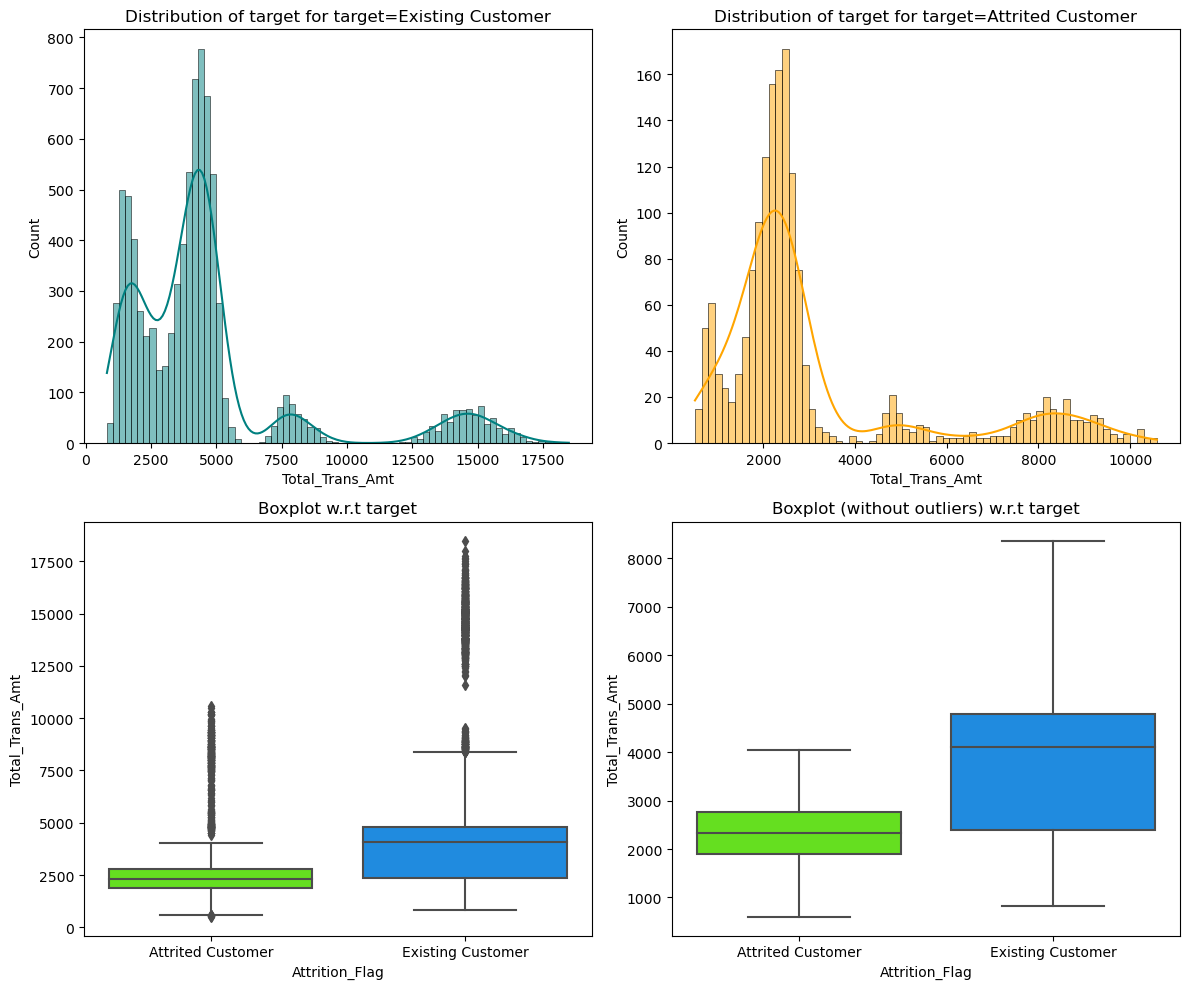

In [33]:
distribution_plot_wrt_target(df,"Total_Trans_Amt","Attrition_Flag")

<span style="color:blue">
<h3>Months on Book<h3>
<ul>
<li>Mean Median matches</li>
<li>No Significant Difference between target class</li>
</ul>
</span>

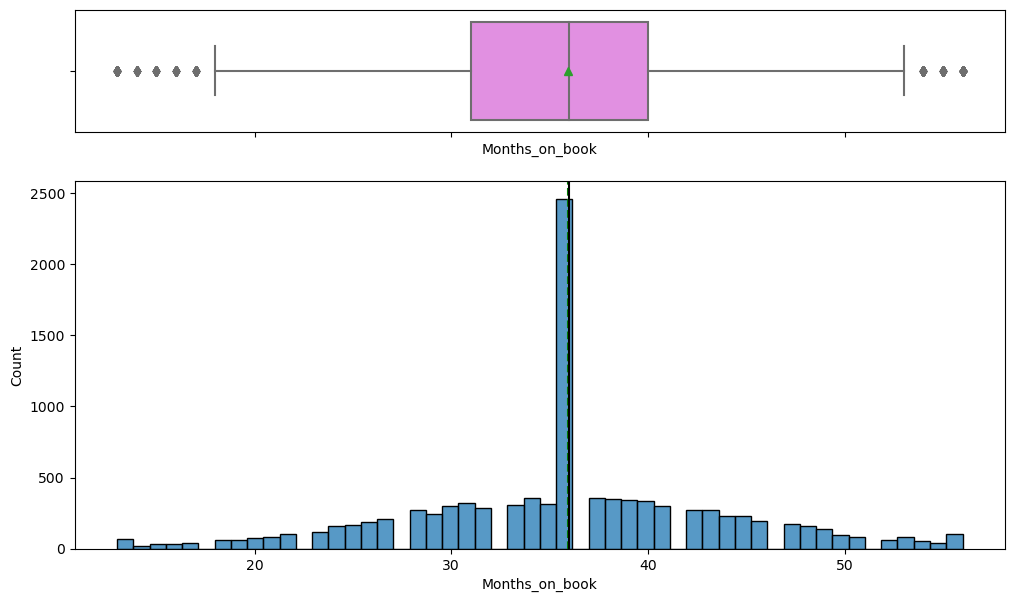

In [34]:
histogram_boxplot(df,"Months_on_book");  

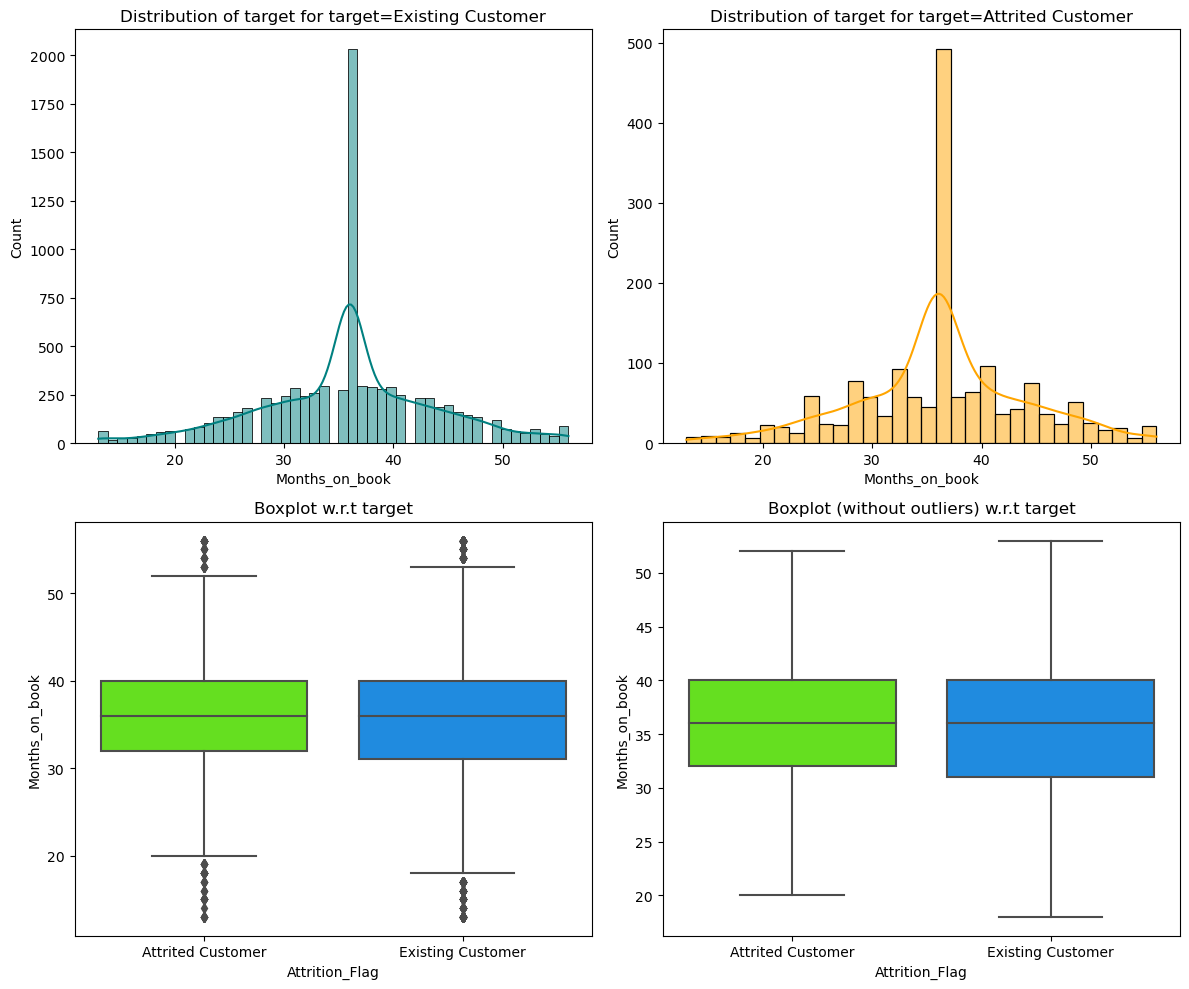

In [35]:
distribution_plot_wrt_target(df,"Months_on_book","Attrition_Flag")

<span style="color:blue">
<h3>Total_Revolving_Bal<h3>
<ul>
<li>Total_Revolving_Bal is lower amount Attritted Customers</li>
<li>Median Total_Revolving_bal is less for customers who left</li>
</ul>
</span>

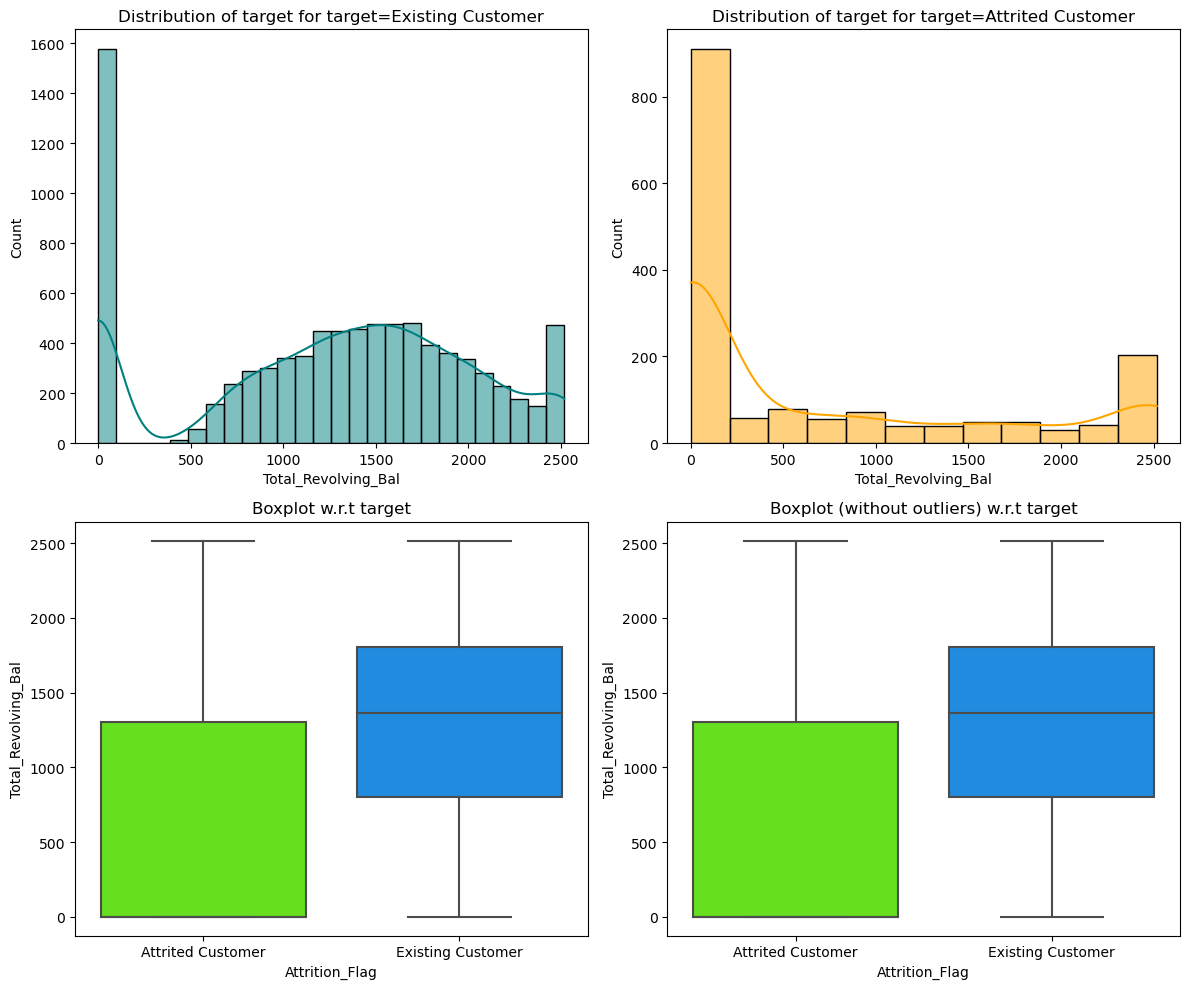

In [36]:
distribution_plot_wrt_target(df,"Total_Revolving_Bal","Attrition_Flag")

<span style="color:blue">
<h3>Total_Relationship_Count<h3>
<ul>
<li>There seems to be declining relationship counts for customers who left</li>
<li>Median Total_Relationship_Count is less for customers who left</li>
<li>Customers who have multiple products with the bank seems to stay</li>
</ul>
</span>

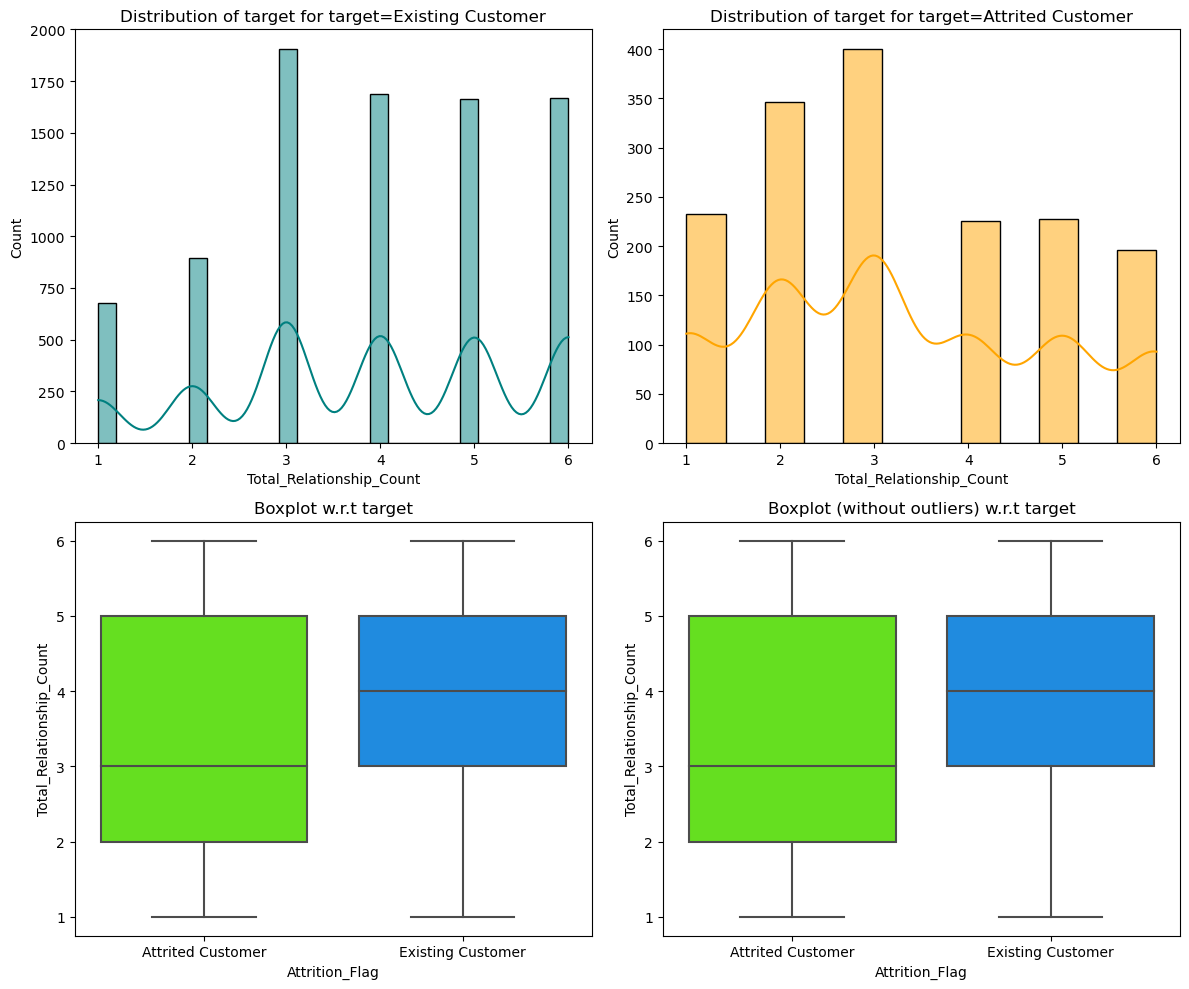

In [37]:
distribution_plot_wrt_target(df,"Total_Relationship_Count","Attrition_Flag")

<span style="color:blue">
<h3>Average Utilization Ratio<h3>
<ul>
<li>Mean Median matches</li>
<li>Attrited Customers seems to have lower utilization than existing customer</li>
</ul>
</span>

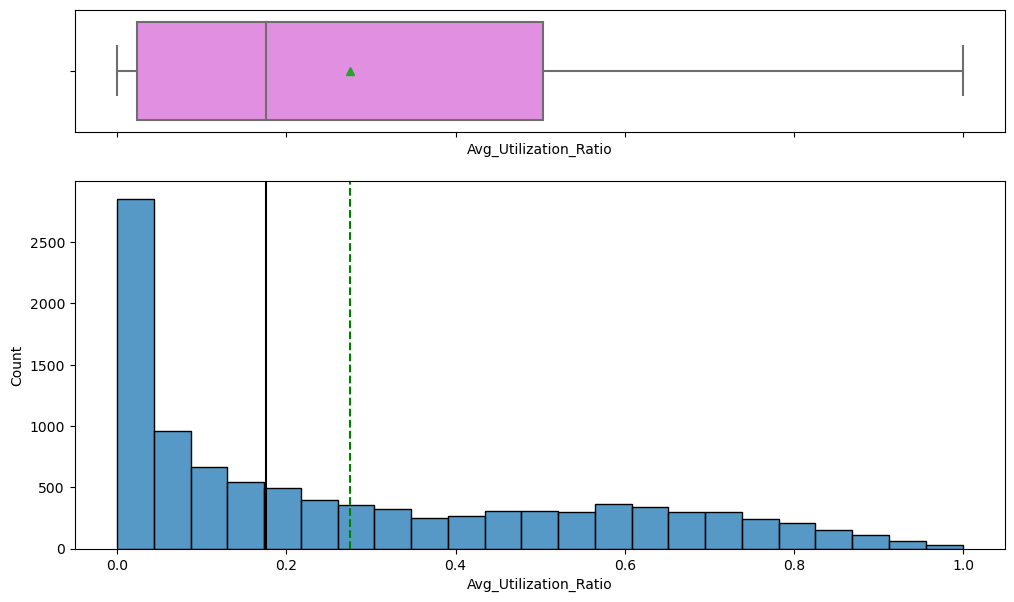

In [38]:
histogram_boxplot(df,"Avg_Utilization_Ratio"); 

<span style="color:blue">
<h3>Avg_Utilization_Ratio<h3>
<ul>
<li>There is very low utilization in general for customers who left</li>
<li>Median Avg_Utilization_Ratio is less for customers who left</li>
</ul>
</span>

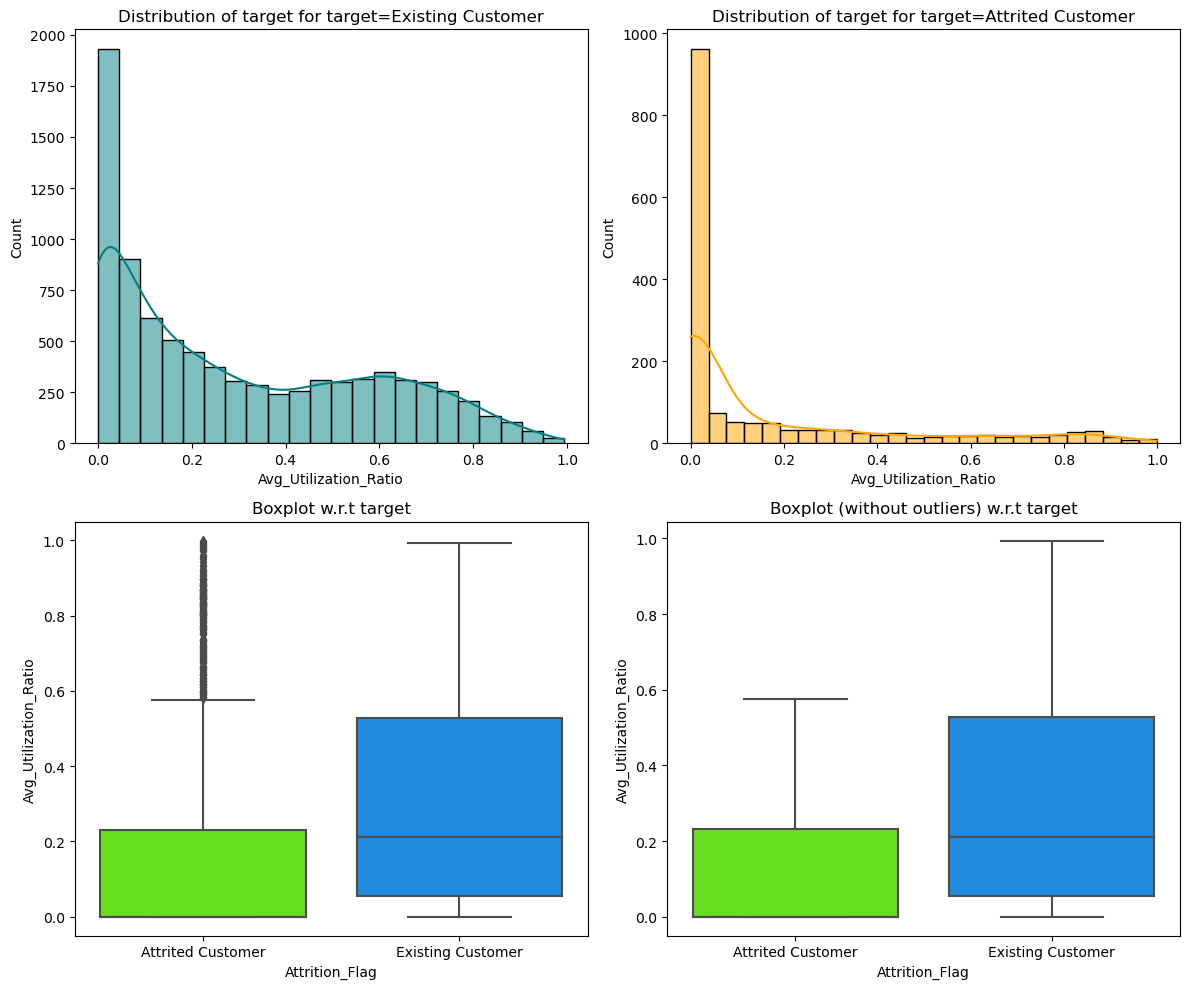

In [39]:
distribution_plot_wrt_target(df,"Avg_Utilization_Ratio","Attrition_Flag")

<span style="color:blue">
<h3>Total_Amt_Chng_Q4_Q1<h3>
<ul>
<li>Distribution seems to be normal but with fat tails</li>
<li>Attrited Customers seems higher variance</li>
</ul>
</span>

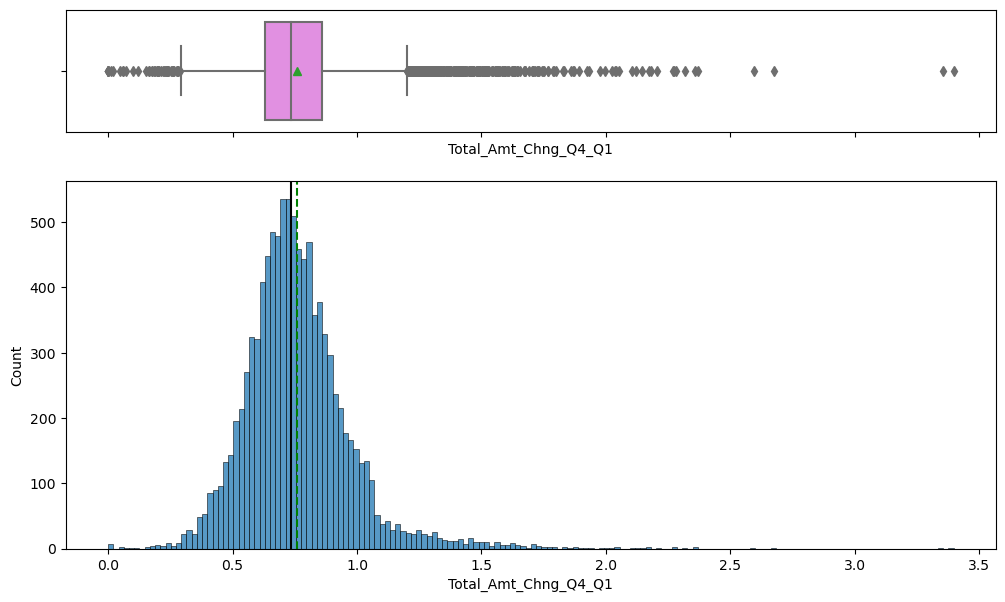

In [40]:
histogram_boxplot(df,"Total_Amt_Chng_Q4_Q1"); 

<span style="color:blue">
<h3>Total_Amt_Chng_Q4_Q1<h3>
<ul>
<li>Distribution seems to be normal but with fat tails</li>
<li>Attrited Customers seems higher variance</li>
</ul>
</span>

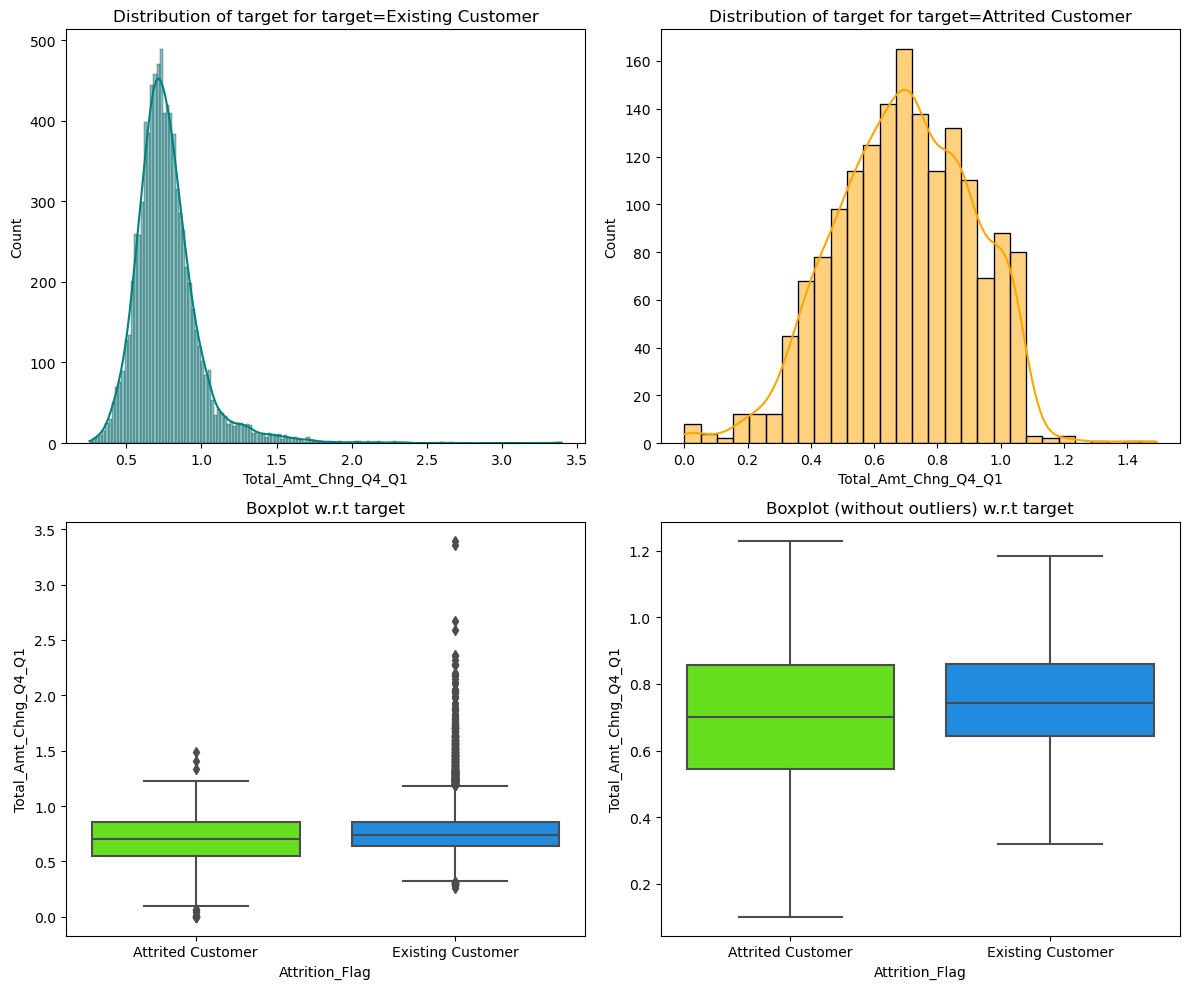

In [41]:
distribution_plot_wrt_target(df,"Total_Amt_Chng_Q4_Q1","Attrition_Flag")

<span style="color:blue">
<h3>Customer_Age<h3>
<ul>
<li>Distribution seems to be normal for both classes</li>
<li>Box plot also looks similar for both classes</li>
</ul>
</span>

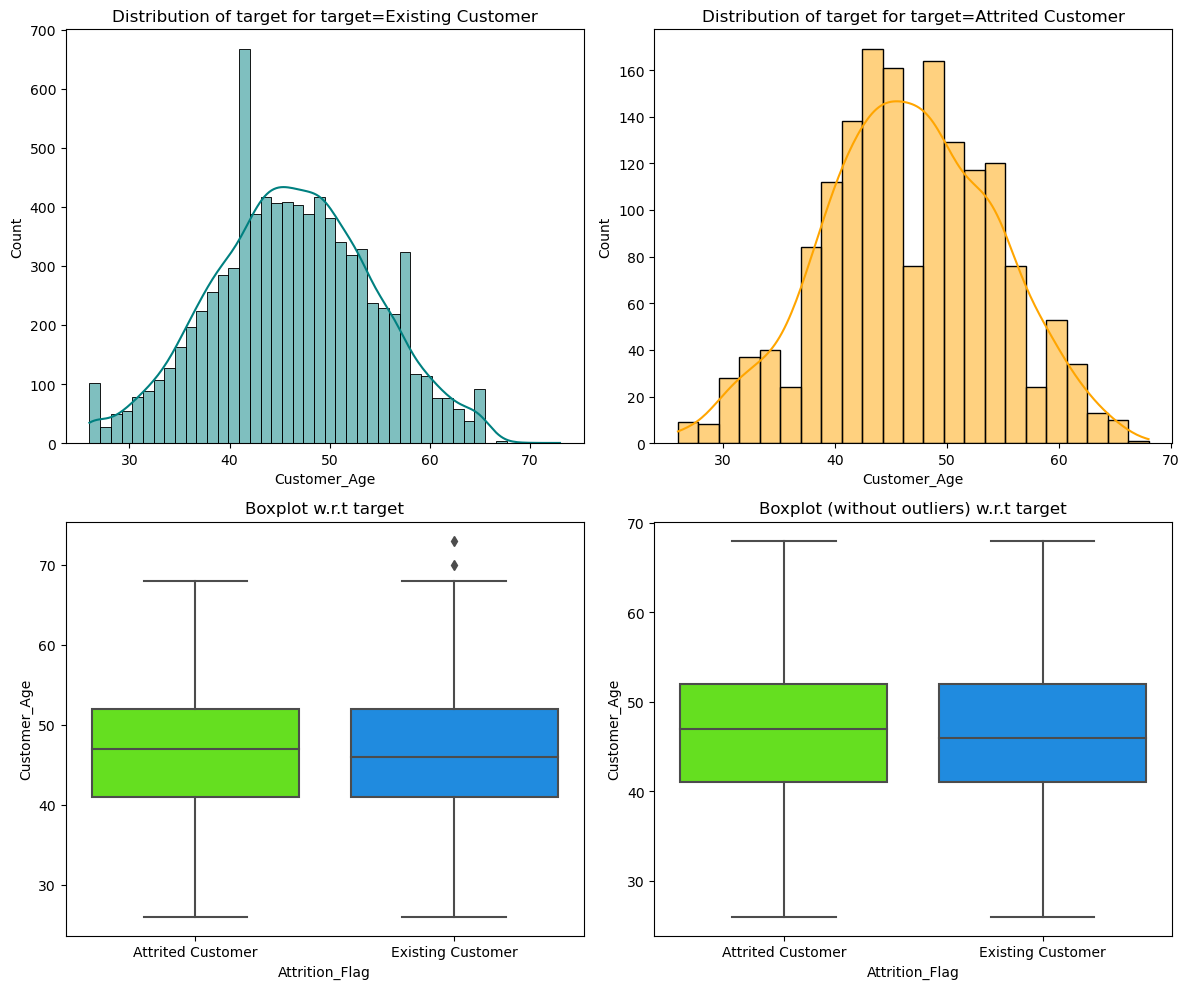

In [42]:
distribution_plot_wrt_target(df,"Customer_Age","Attrition_Flag")

<span style="color:blue">
<h3>Gender<h3>
<ul>
<li>Attrition seems to be the same irrespective of Gender</li>
</ul>
</span>

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


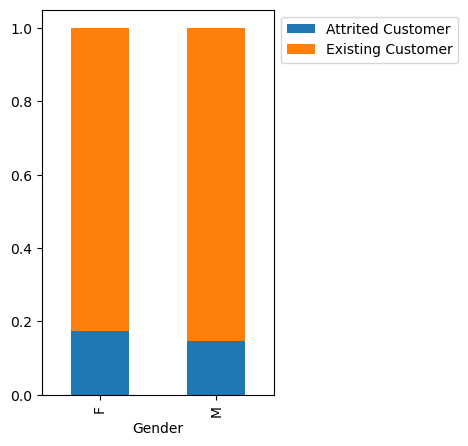

In [43]:
stacked_barplot(df,"Gender","Attrition_Flag")

<span style="color:blue">
<h3>Education_Level<h3>
<ul>
<li>Attrition seems to be the same irrespective of Education</li>
<li>But higher education level tends to be Attrited Customer</li>
</ul>
</span>

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


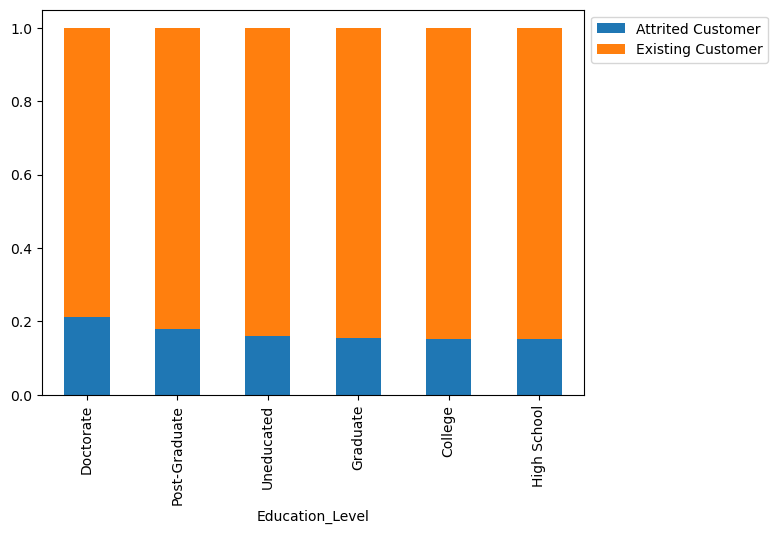

In [44]:
stacked_barplot(df,"Education_Level","Attrition_Flag")

<span style="color:blue">
<h3>Dependent_count<h3>
<ul>
<li>Attrition seems to be the same irrespective of Dependent Count</li>
</ul>
</span>

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


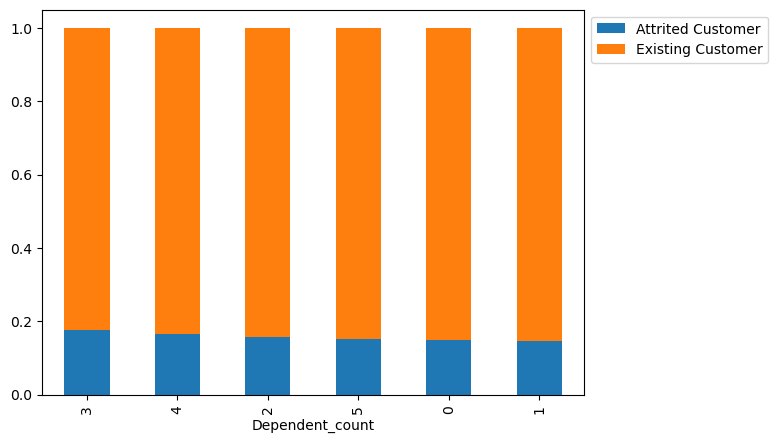

In [45]:
#labeled_barplot(df, "Dependent_count")
stacked_barplot(df,"Dependent_count","Attrition_Flag")

<span style="color:blue">
<h3>Contacts_Count_12_mon<h3>
<ul>
<li>Increase contacts leads to higherAttrition,it is possible they have issues that were not resolved</li>
<li>Customers seems to be signalling their unhapiness with higher contacts</li>
</ul>
</span>

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


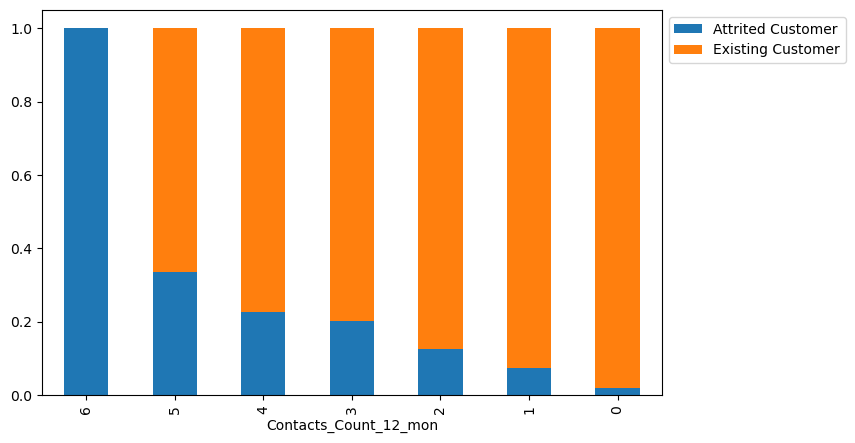

In [46]:
stacked_barplot(df,"Contacts_Count_12_mon","Attrition_Flag")

<span style="color:blue">
<h3>Months_Inactive_12_mon<h3>
<ul>
<li>Attrition seems to be the high if as account is inactive,it is possible they are not utlizing the card hence they leave</li>
</ul>
</span>

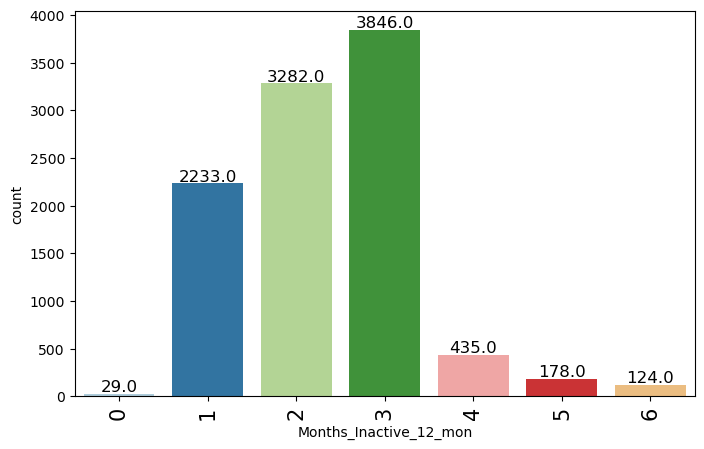

In [47]:
labeled_barplot(df,"Months_Inactive_12_mon")

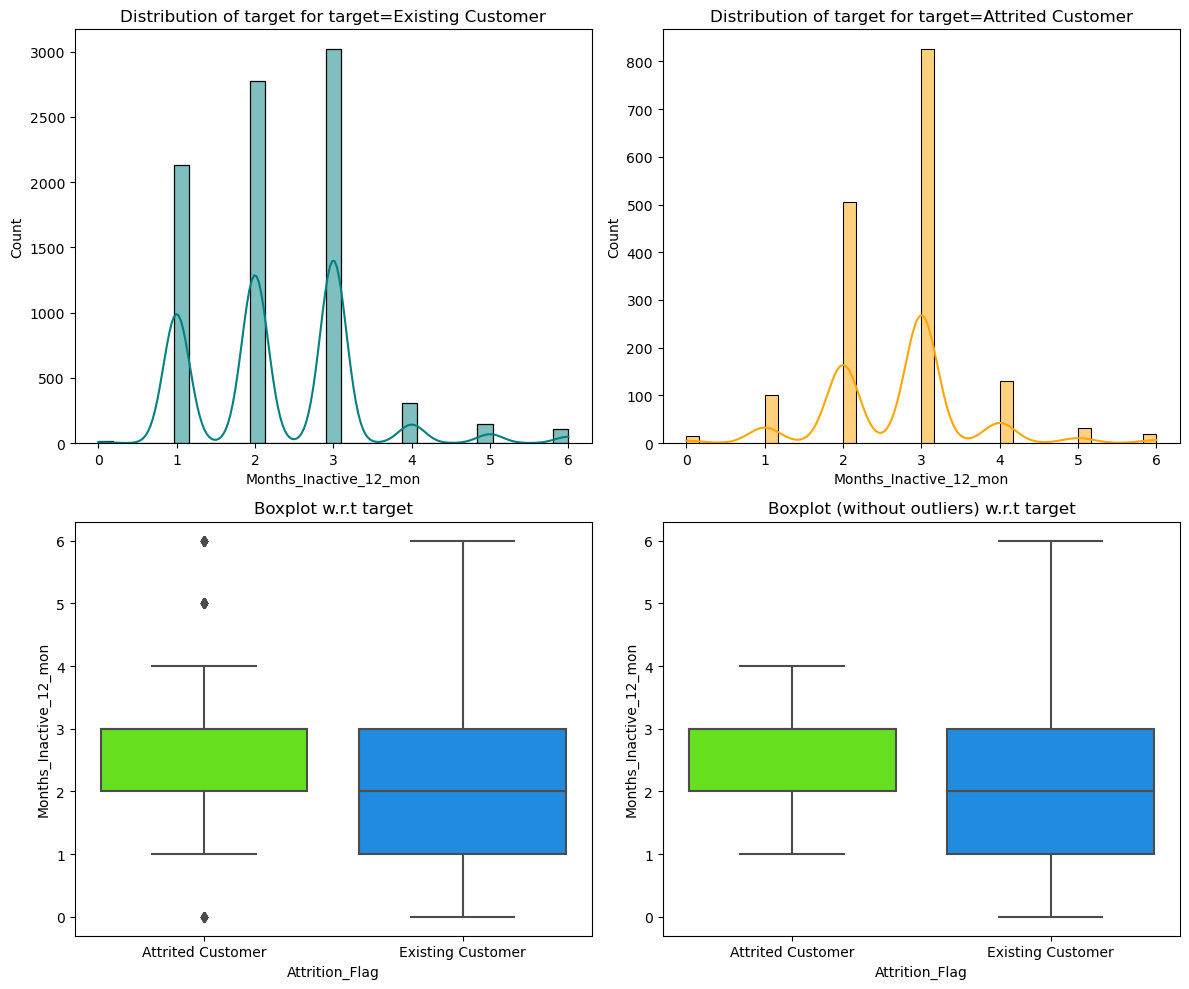

In [48]:
distribution_plot_wrt_target(df,"Months_Inactive_12_mon","Attrition_Flag")

<span style="color:blue">
<h3>Correlation<h3>
<ul>
<li>Total_Trans_Ct and Total_Trans_Amt have high correlation of 0.81, we will drop Total_Trans_Amt</li>
<li>Months_on_book and Customer_Age have high correlation of 0.79</li>
<li>Avg_Utilization_Ratio and Credit_Limit have negative corrlelation of -0.48</li>
<li>Avg_Utilization_Ratio and Avg_Open_To_Buy have negative corrlelation of -0.54</li>
<li>Avg_Open_To_Buy has correlation of 1 with Credit_Limit and should be dropped</li>
</ul>
</span>

In [49]:
df_numeric = df.select_dtypes(include=['number'])

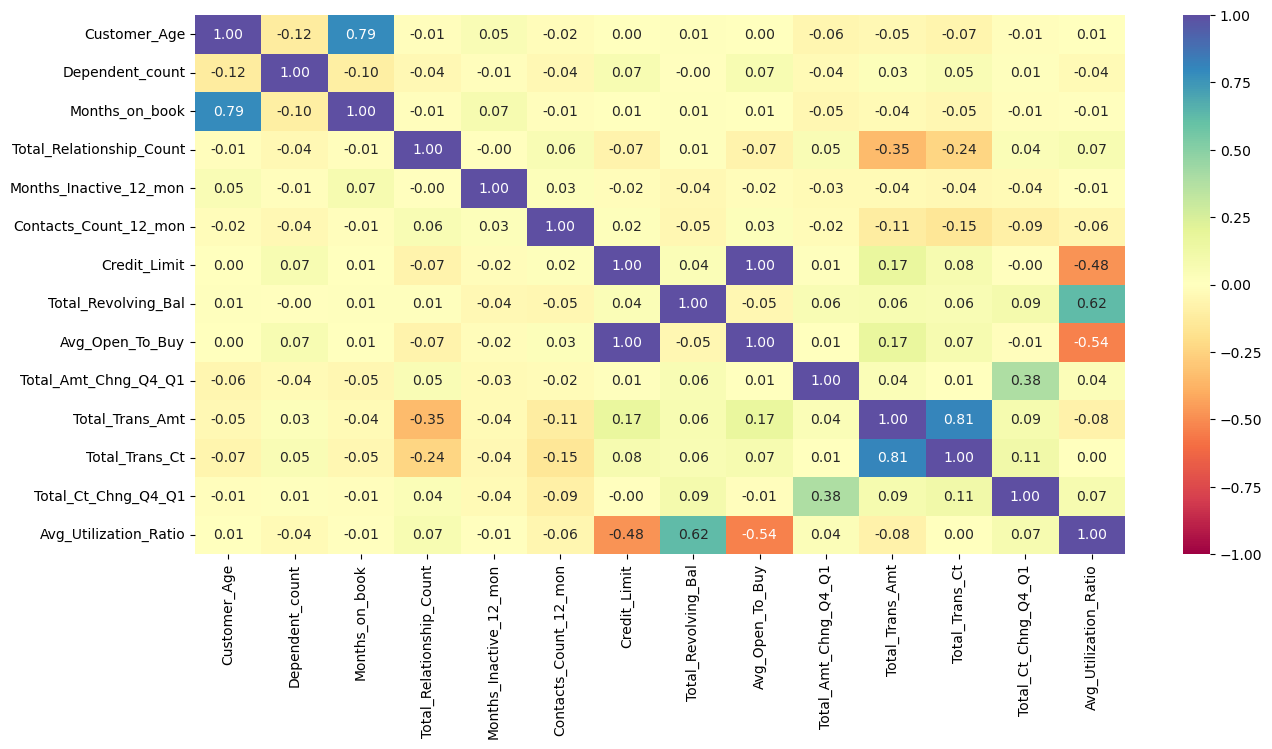

In [50]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") 
# only one of the columns could be used in the model
# customer_age and months_on_book have high correlation
# avg_open_to_buy and credit_limit have high correlation
# total_trans_ct and total_trans_amt high correlation
plt.show()

## Data Pre-processing

<span style="color:blue">
<h3>The following columns are outliers<h3>
<ul>
<li>As shown in the table, IsOutlier=True and OulierCount > 0 means the column name is an outlier</li>
</ul>
</span>

In [51]:
def select_outliers(df):
    """
    select columns that are outliers
    df: input pandas data frame
    """
    result_df = pd.DataFrame()
    df_numeric = df.select_dtypes(include='number')
    for colname in df_numeric.columns:
        q1 = df[colname].quantile(0.25)
        q3 = df[colname].quantile(0.75)
        iqr = q3-q1
        lbound = q1 - 1.5*iqr
        ubound = q3 + 1.5*iqr
        rows_with_outliers = df[(df[colname] < lbound) | (df[colname] > ubound)]
        #print(colname,rows_with_outliers.shape)
        result = pd.DataFrame({ "Colname": [colname],"OutlierCount": [rows_with_outliers.shape[0]],"IsOutlier": [not rows_with_outliers.empty],"lbound":lbound,"ubound":ubound})
        result_df = pd.concat([result_df,result],ignore_index=True) 
    
    return result_df.sort_values(by='IsOutlier',ascending=False,ignore_index=True)        

select_outliers(df)

Colname  OutlierCount  IsOutlier     lbound    ubound
0               Customer_Age             2       True     24.500    68.500
1             Months_on_book           386       True     17.500    53.500
2     Months_Inactive_12_mon           331       True      0.500     4.500
3      Contacts_Count_12_mon           629       True      0.500     4.500
4               Credit_Limit           984       True -10213.750 23836.250
5            Avg_Open_To_Buy           963       True -11477.250 22660.750
6       Total_Amt_Chng_Q4_Q1           396       True      0.289     1.201
7            Total_Trans_Amt           896       True  -1722.750  8619.250
8             Total_Trans_Ct             2       True     -9.000   135.000
9        Total_Ct_Chng_Q4_Q1           394       True      0.228     1.172
10           Dependent_count             0      False     -2.000     6.000
11  Total_Relationship_Count             0      False      0.000     8.000
12       Total_Revolving_Bal             0      False  -1778.500  3921.500
13     Avg_Utilization_Ratio             0      False     -0.697     1.223

<span style="color:blue">
<h3>Fix Data<h3>
<ul>
<li>Replace Target values with 0 and 1 values, 1 means Attrited, our goal is to prevent attrition</li>
<li>Replace "abc" with nan so that we can impute nan as most frequent, this is based on above analysis</li>
<li>Dropping Avg_Open_To_Buy and Total_Trans_Amount due to very high correlations</li>
<li>We will be using tree based model and hence we will not scale the data</li>
</ul>
</span>

In [52]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [53]:
df = df.drop(["Avg_Open_To_Buy","Total_Trans_Amt"], axis=1) # dropping due to correlation of 1 with credit limit

In [54]:
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [55]:
df["Income_Category"].replace("abc", np.nan, inplace=True)
df["Income_Category"].unique()

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', NaN]
Categories (5, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K']

## Missing value imputation




<span style="color:blue">
<h3>First Split data then do Imputation<h3>
<ul>
<li>This is to avoid Data Leak</li>
<li>The distribution of entire data set can leak in to test, hence we split and then individually impute each split</li>
</ul>
</span>

In [56]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 17) (2026, 17) (2026, 17)


<span style="color:blue">
<h3>These columns have missing values<h3>
<ul>
<li>We will impute these columns</li>
</ul>
</span>

In [57]:
cols_to_impute = list(df.columns[df.isna().sum() > 0])
print(list(cols_to_impute))

['Education_Level', 'Marital_Status', 'Income_Category']


In [58]:
# Fit and transform the train data
imp_mode = SimpleImputer(strategy="most_frequent")
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform the validation data
X_val[cols_to_impute]  = imp_mode.transform(X_val[cols_to_impute])
# Transform the test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

<span style="color:blue">
<h3>No More Missing Values<h3>
</span>

In [59]:
print(X_train.columns[X_train.isna().sum() > 0],X_val.columns[X_val.isna().sum() > 0],X_test.columns[X_test.isna().sum() > 0])

Index([], dtype='object') Index([], dtype='object') Index([], dtype='object')


In [60]:
X_train = pd.get_dummies(data=X_train, drop_first=True) # ah we are doing dummies after split
X_val = pd.get_dummies(data=X_val, drop_first=True) # we should check if this has not caused issues in test and train having different columns
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [61]:
if not (X_train.shape[1] == X_val.shape[1] == X_test.shape[1]):
    raise Exception("All Column names should be the same after creating dummies, it is possible that split has remove some values, so that column will not be present")

In [62]:
print(f"All have same column {X_train.shape} {X_val.shape} {X_test.shape}")

All have same column (6075, 27) (2026, 27) (2026, 27)


In [63]:
X_train.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
800             40                2              21                         6   
498             44                1              34                         6   
4356            48                4              36                         5   
407             41                2              36                         6   
8728            46                4              36                         2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
800                        4                      3     20056.000   
498                        2                      0      2885.000   
4356                       1                      2      6798.000   
407                        2                      0     27000.000   
8728                       2                      3     15034.000   

      Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
800                  1602                 0.466              46   
498                  1895                 0.387              31   
4356                 2517                 0.873              79   
407                     0                 0.610              39   
8728                 1356                 0.754              84   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  \
800                 0.533                  0.080      True   
498                 0.632                  0.657      True   
4356                0.881                  0.370      True   
407                 0.300                  0.000      True   
8728                0.750                  0.090      True   

      Education_Level_Doctorate  Education_Level_Graduate  \
800                       False                      True   
498                       False                      True   
4356                      False                     False   
407                       False                      True   
8728                      False                     False   

      Education_Level_High School  Education_Level_Post-Graduate  \
800                         False                          False   
498                         False                          False   
4356                         True                          False   
407                         False                          False   
8728                         True                          False   

      Education_Level_Uneducated  Marital_Status_Married  \
800                        False                   False   
498                        False                    True   
4356                       False                    True   
407                        False                    True   
8728                       False                   False   

      Marital_Status_Single  Income_Category_$40K - $60K  \
800                    True                        False   
498                   False                        False   
4356                  False                        False   
407                   False                        False   
8728                  False                         True   

      Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
800                         False                         False   
498                         False                         False   
4356                        False                          True   
407                          True                         False   
8728                        False                         False   

      Income_Category_Less than $40K  Card_Category_Gold  \
800                            False               False   
498                             True               False   
4356                           False               False   
407                            False               False   
8728                           False               False   

      Card_Category_Platinum  Card_Category_Silver  
800          

In [64]:
y_train.unique() # now it looks good, I had forgotten to replace target with 1 or 0

[0, 1]
Categories (2, int64): [1, 0]

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [65]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

<span style="color:blue">
<h3>Function to build train validate with SHAP<h3>
</span>

In [66]:
def Build_Train_Valid_PerformanceWithSHAP(msg,X_train,y_train,X_Val,y_val):
    """
    This function trains and validates model of different types
    Each model is stored in models list
    SHAP explainer is used for ["Xgboost","dtree","Random forest"], not implemented for others to save on runtime
    
    msg: Message any descriptive text
    X_train: training data
    y_train: training target
    X_Val: validation data
    y_val: validatoin target
    """
    print(X_train.shape,y_train.shape)
    models = []  # Empty list to store all the models
    
    # Appending models into the list
    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
    models.append(("Bagging", BaggingClassifier(random_state=1)))
    models.append(("Random forest", RandomForestClassifier(random_state=1)))
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
    models.append(("dtree", DecisionTreeClassifier(random_state=1)))
    
    
    print(f"Sampling Type: {msg}")
    print("\nTraining Performance:\n")
    for name, model in models:
        model.fit(X_train, y_train)
        scores = recall_score(y_train, model.predict(X_train))
        print(f"Training Model Name: {name}, Recall Score: {scores:.3f}")
         
        if name in ["Xgboost","dtree","Random forest"]:
            explainer = shap.TreeExplainer(model) # adding explainers using SHAP we learned in Mentor session
            shap_values = explainer.shap_values(X_train)
            shap.summary_plot(shap_values, X_train,title=f"Mode:{name} Sampling: {msg}")
            if name == "Xgboost":
                for name in X_train.columns: # additional plot for xgboost not implemented for others to save time
                    shap.dependence_plot(name, shap_values, X_train)
            
    print("-"*100)
    print("\nValidation Performance:\n")

    for name, model in models:
        model.fit(X_train, y_train)
        scores_val = recall_score(y_val, model.predict(X_val))
        print(f"Model Name: {name}, Recall Score: {scores_val:.3f}")
   


(6075, 27) (6075,)
Sampling Type: Original Data

Training Performance:

Training Model Name: Xgboost, Recall Score: 1.000


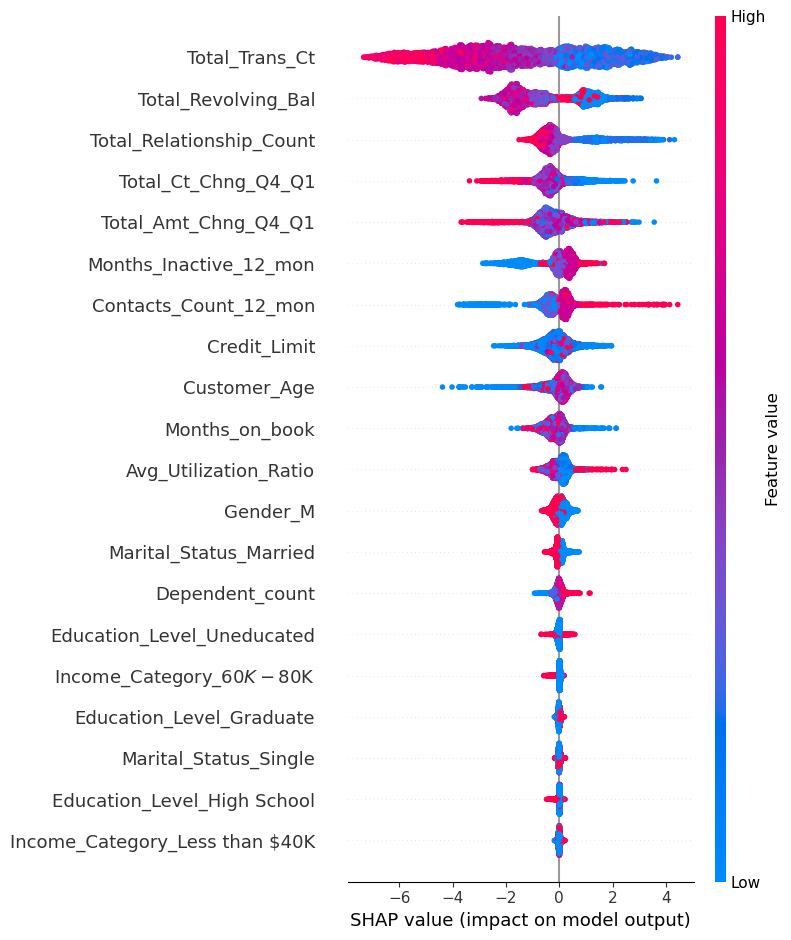

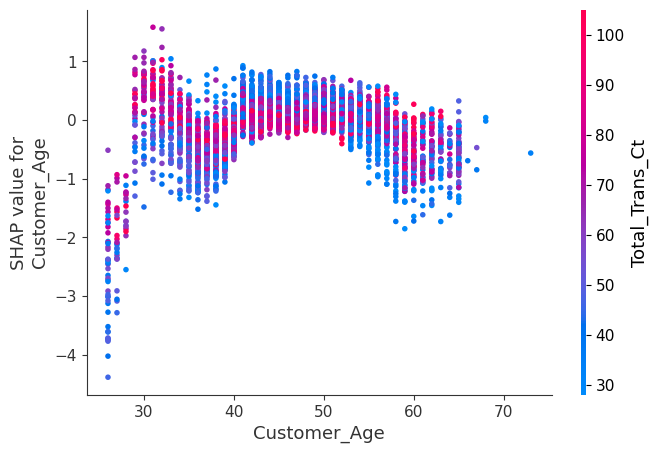

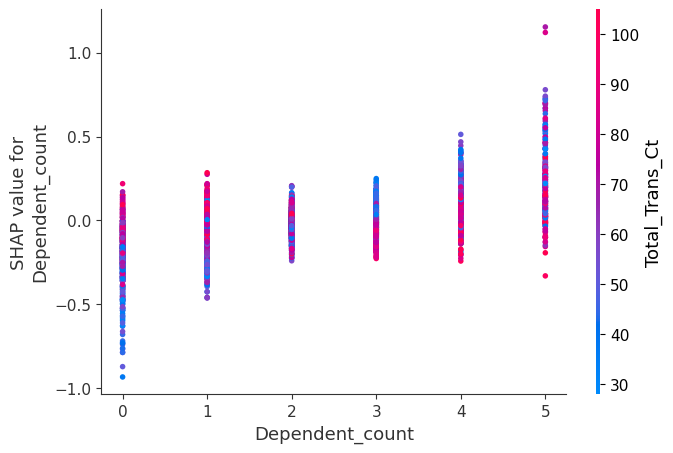

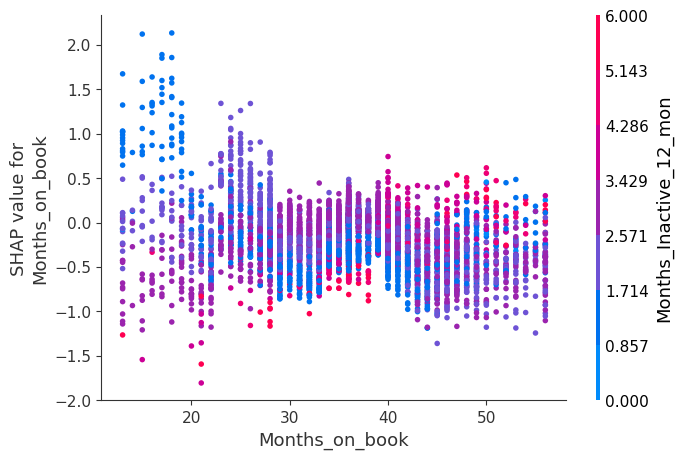

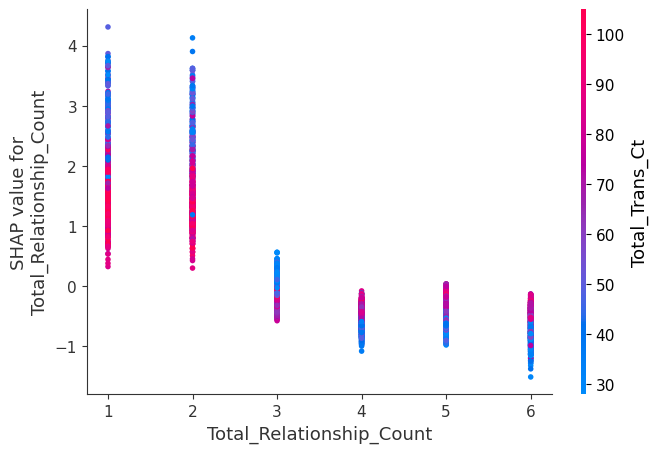

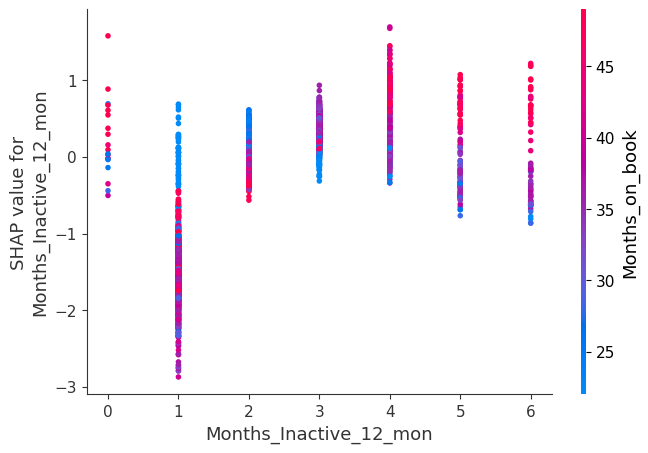

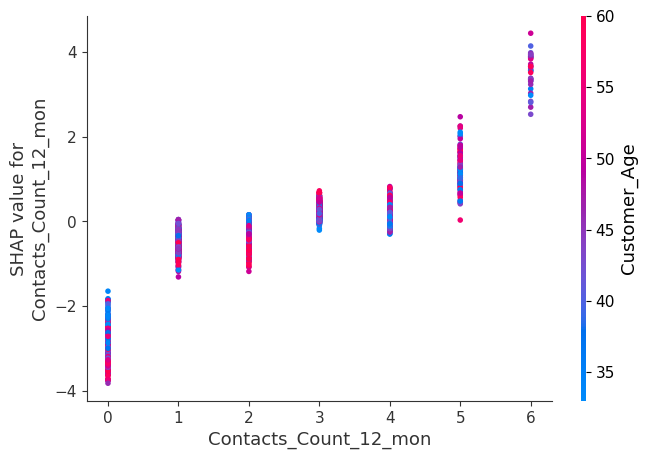

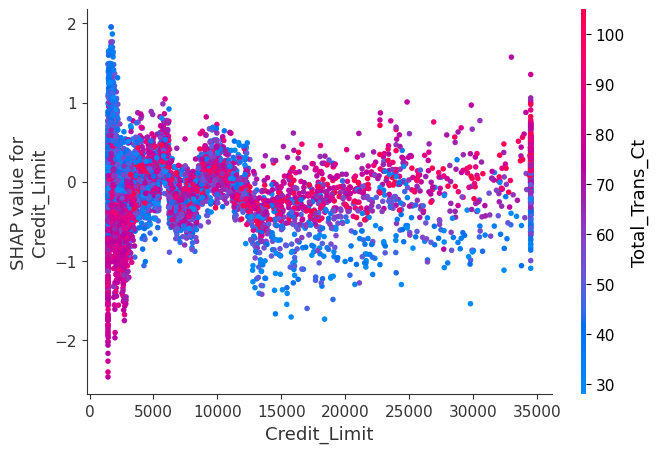

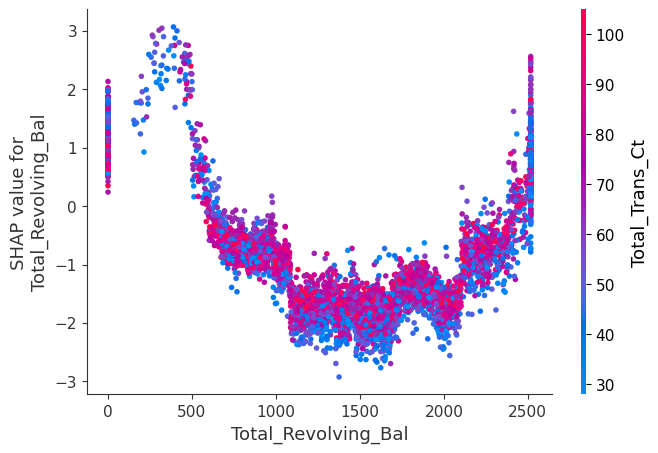

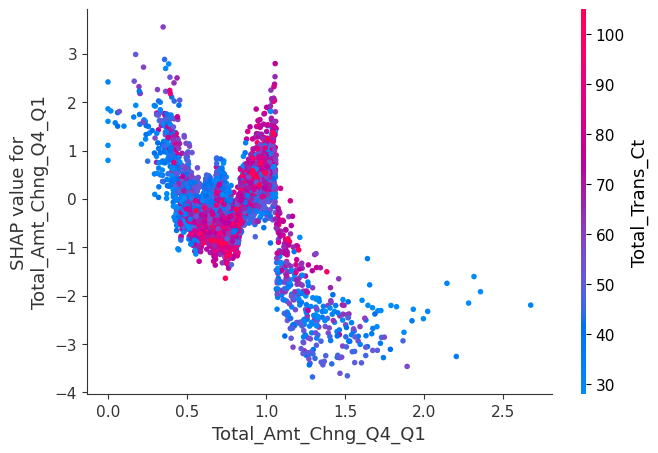

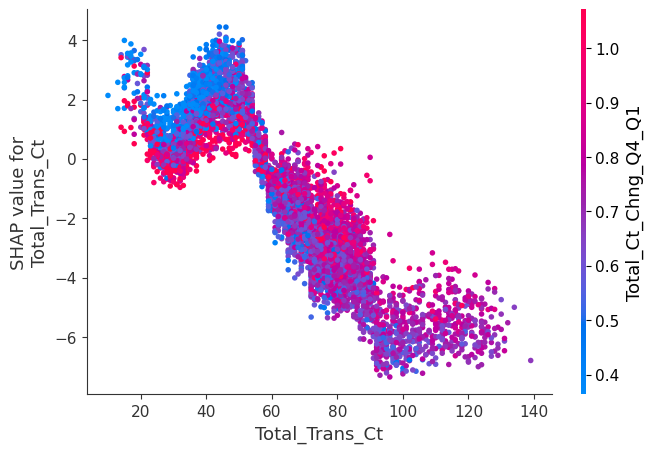

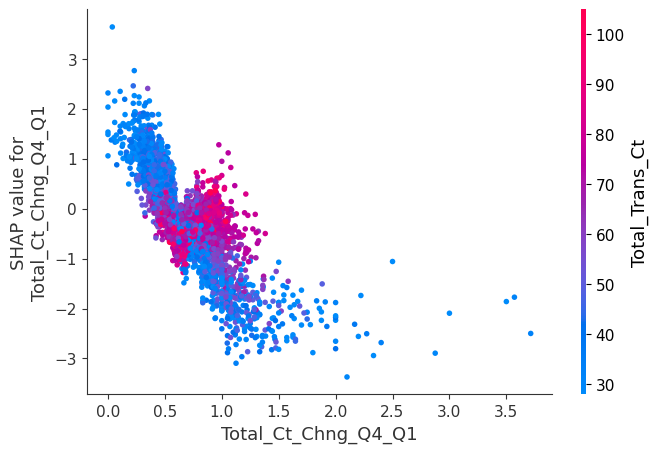

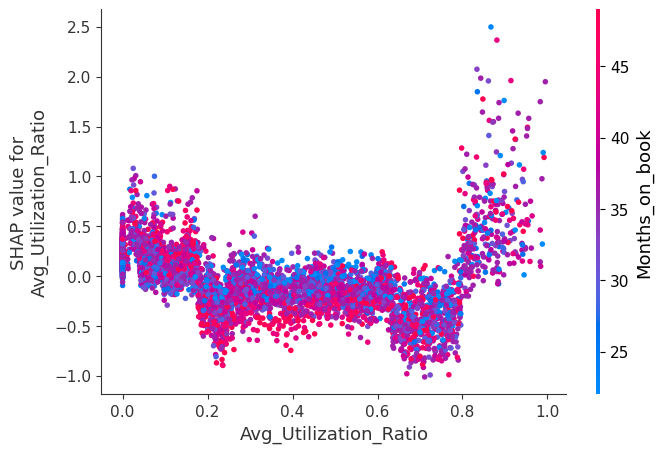

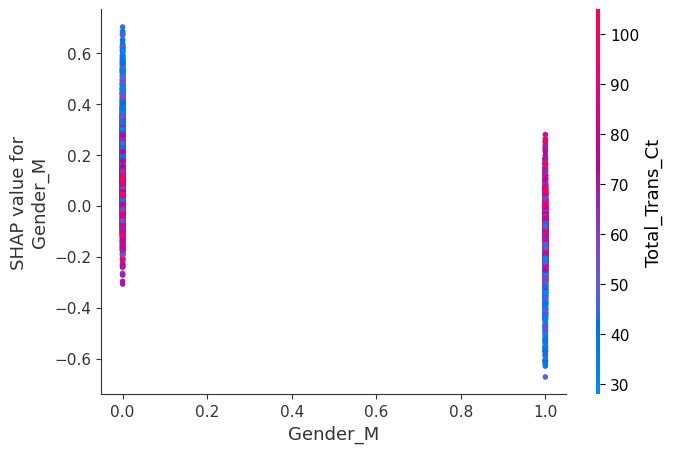

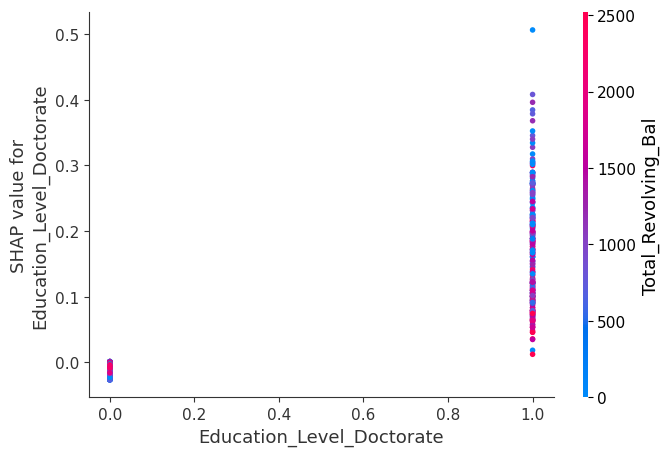

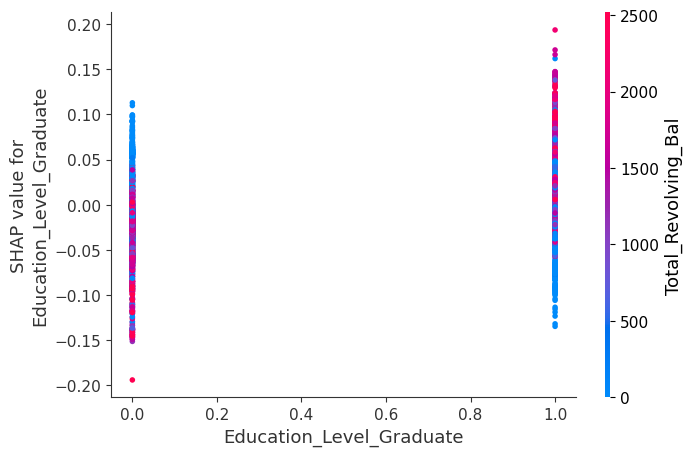

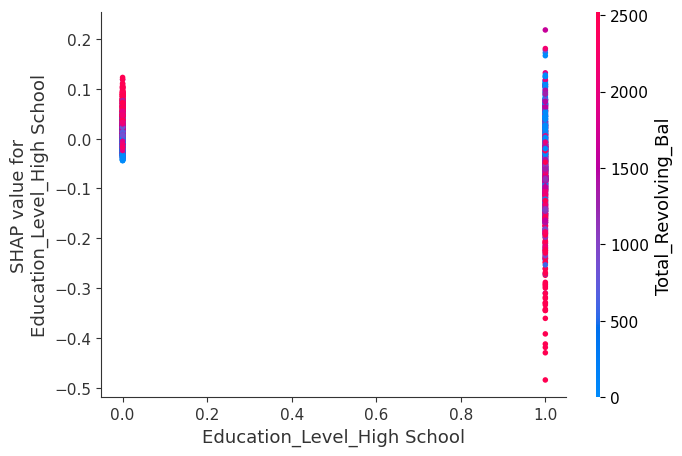

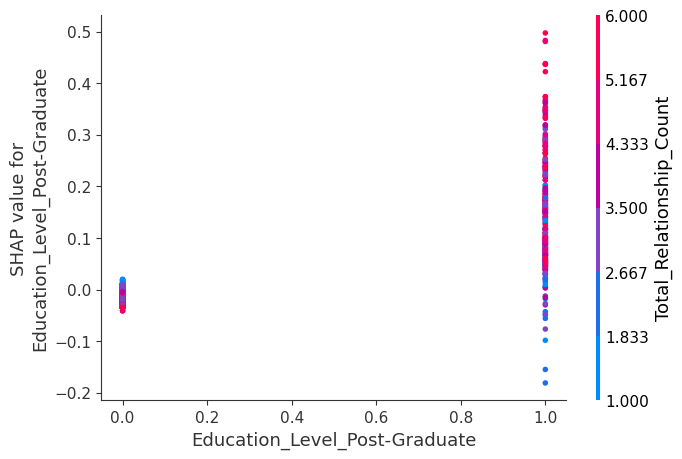

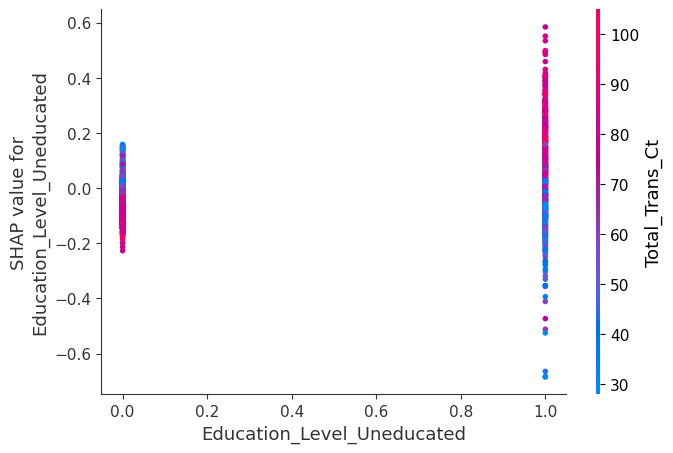

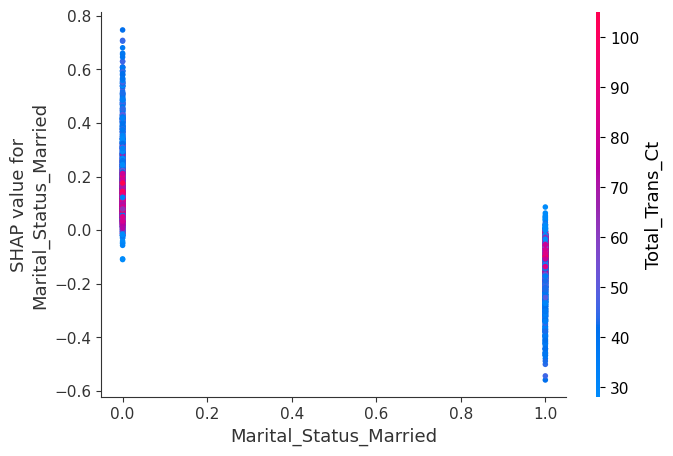

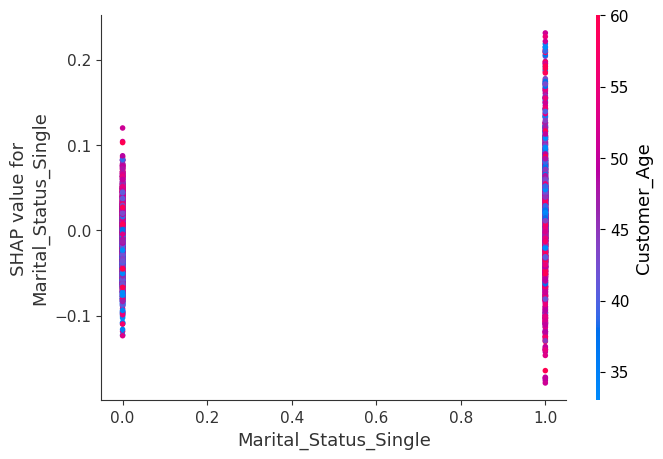

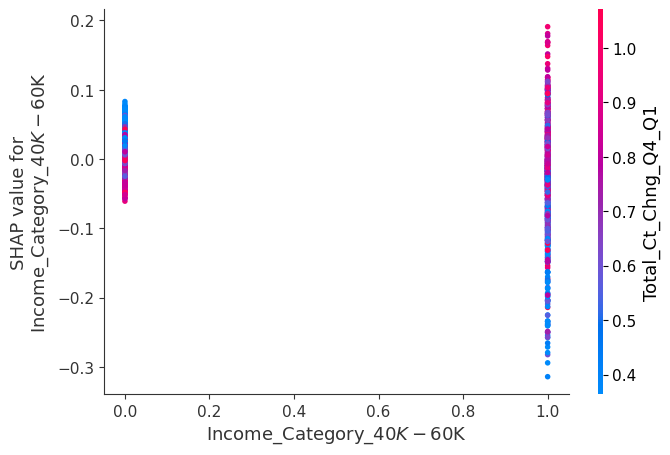

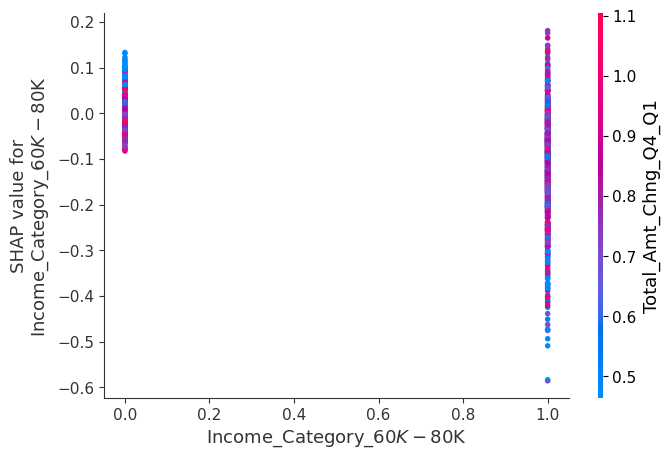

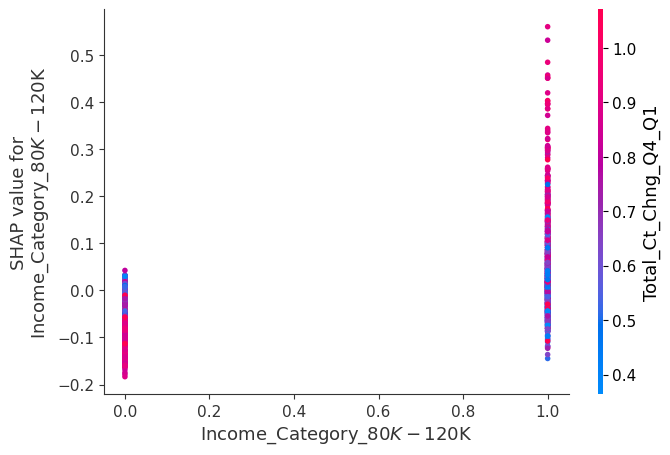

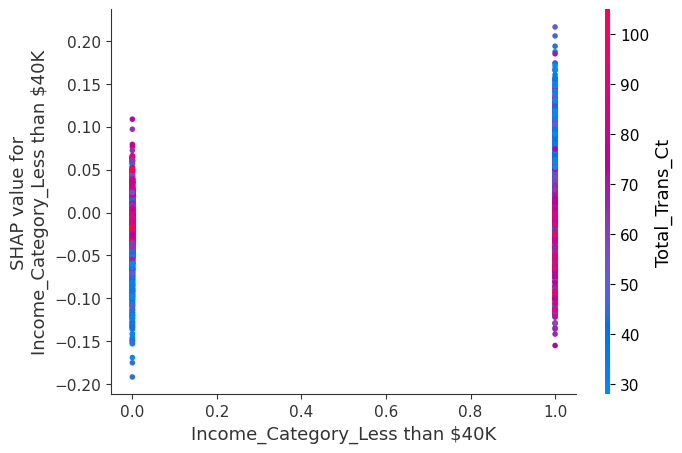

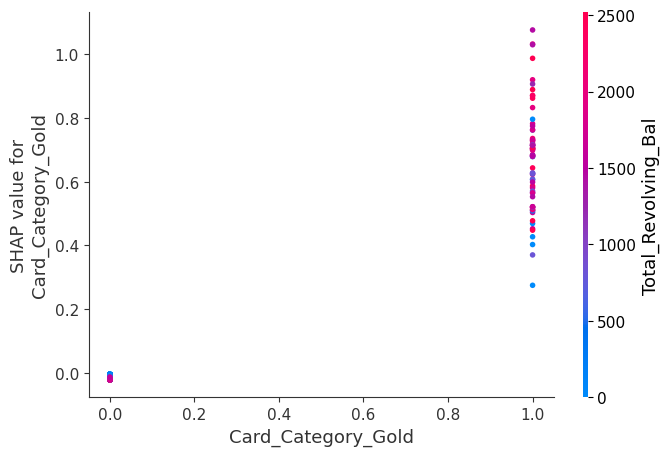

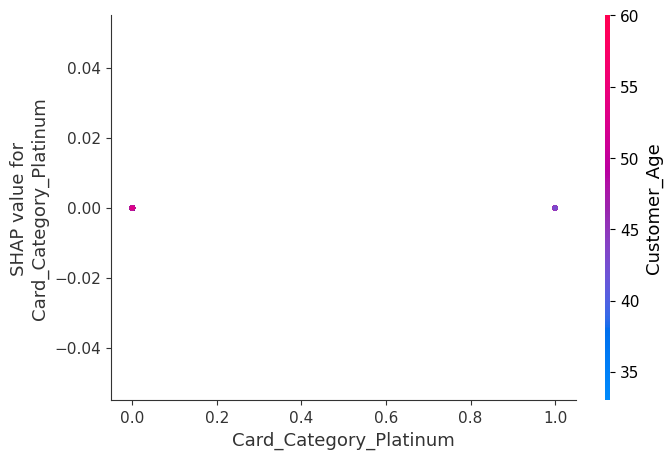

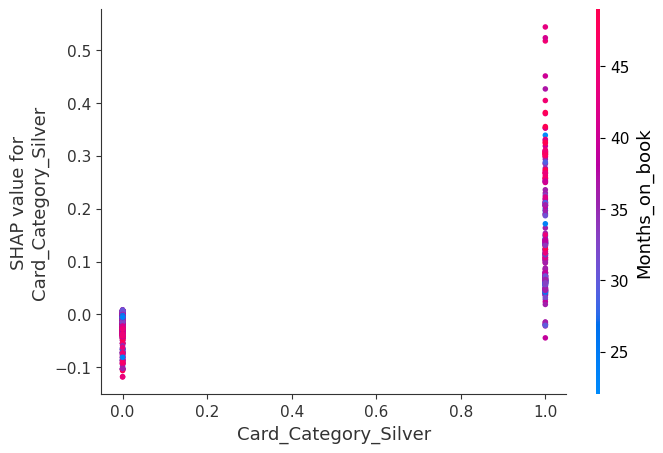

Training Model Name: Bagging, Recall Score: 0.962
Training Model Name: Random forest, Recall Score: 1.000


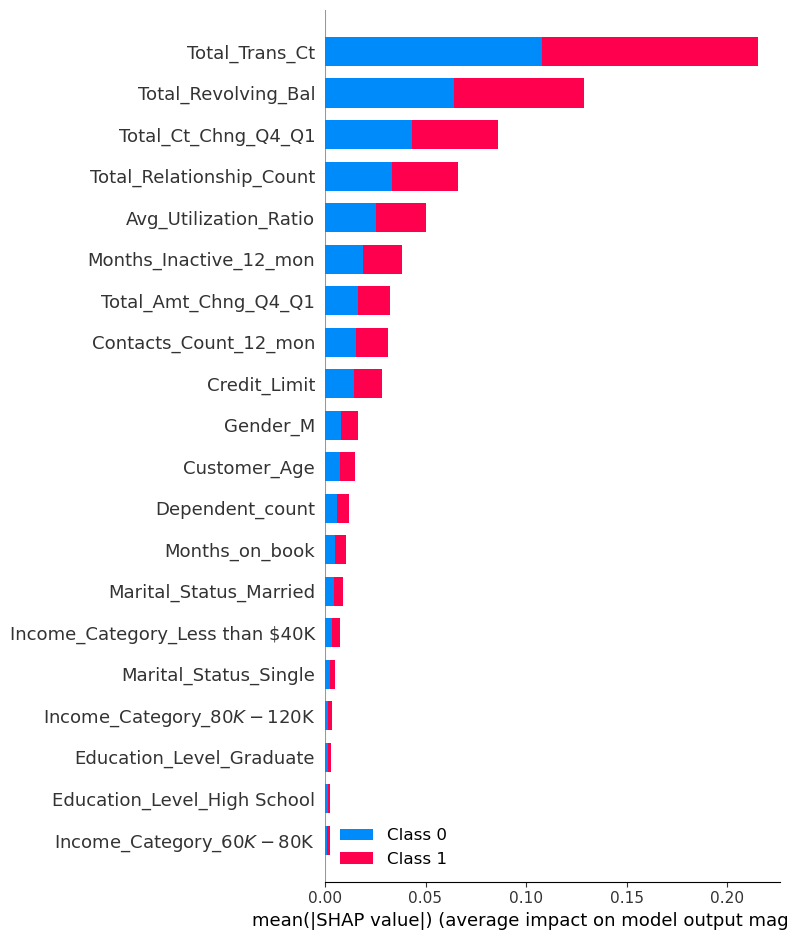

Training Model Name: Adaboost, Recall Score: 0.719
Training Model Name: dtree, Recall Score: 1.000


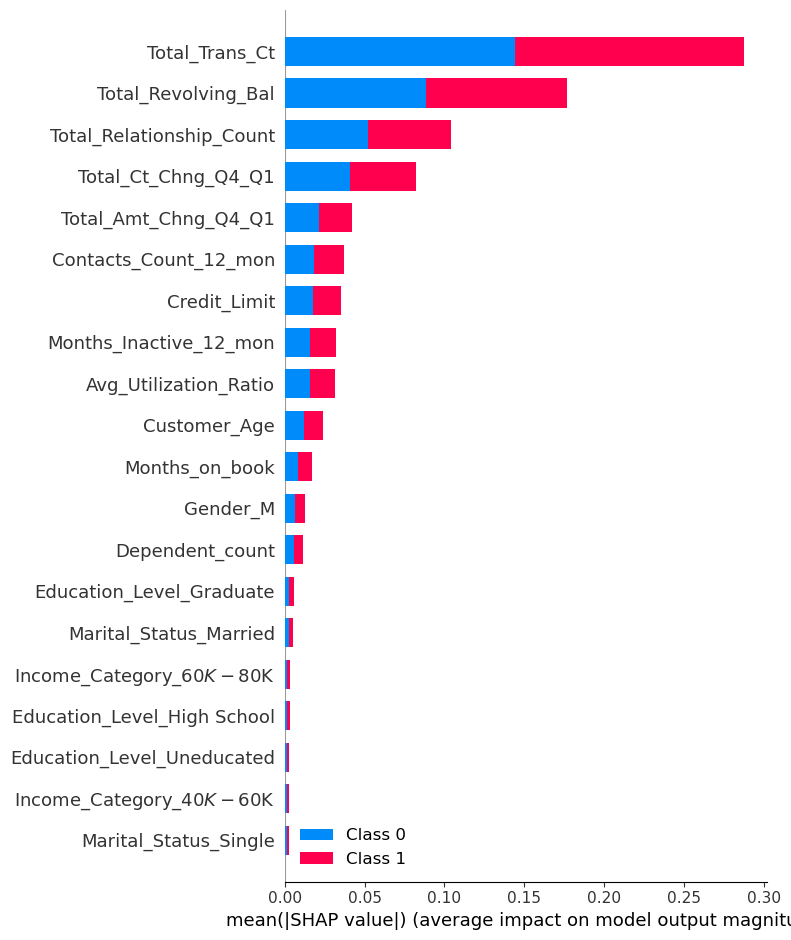

----------------------------------------------------------------------------------------------------

Validation Performance:

Model Name: Xgboost, Recall Score: 0.773
Model Name: Bagging, Recall Score: 0.656
Model Name: Random forest, Recall Score: 0.696
Model Name: Adaboost, Recall Score: 0.730
Model Name: dtree, Recall Score: 0.647


In [67]:
Build_Train_Valid_PerformanceWithSHAP("Original Data",X_train,y_train,X_val,y_val) # we will do this only for original to save on cpu time and submission dead line :-(

### Model Building with Oversampled data


In [68]:
# Synthetic Minority Over Sampling Technique
# needs to be done before modeling
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<span style="color:blue">
<h3>Orversampling Minority Class<h3>
<ul>
<li>Data for minority class has increased to same number as majority, as our strategy=1,which is to get sample number of minority class=1 same as the majority class=0 </li>
</ul>
</span>

In [69]:
print(f"Original Class 1: {np.sum(y_train == 1):.2f} Class 0: {sum(y_train == 0):.2f}")
print(f"Original Shape X_Train : {X_train.shape[0]} y_train :{y_train.shape[0]}")
print(f"Over Sample Class 1: {sum(y_train_over == 1):.2f} Class 0: {sum(y_train_over == 0):.2f}")
print(f"Over Sample Shape X_Train : {X_train_over.shape[0]} y_train :{y_train_over.shape[0]} y_train/2 :{y_train_over.shape[0]/2} -> Same as Original Class 0 (Majority)")

Original Class 1: 976.00 Class 0: 5099.00
Original Shape X_Train : 6075 y_train :6075
Over Sample Class 1: 5099.00 Class 0: 5099.00
Over Sample Shape X_Train : 10198 y_train :10198 y_train/2 :5099.0 -> Same as Original Class 0 (Majority)


(10198, 27) (10198,)
Sampling Type: Oversampling Data

Training Performance:

Training Model Name: Xgboost, Recall Score: 0.999


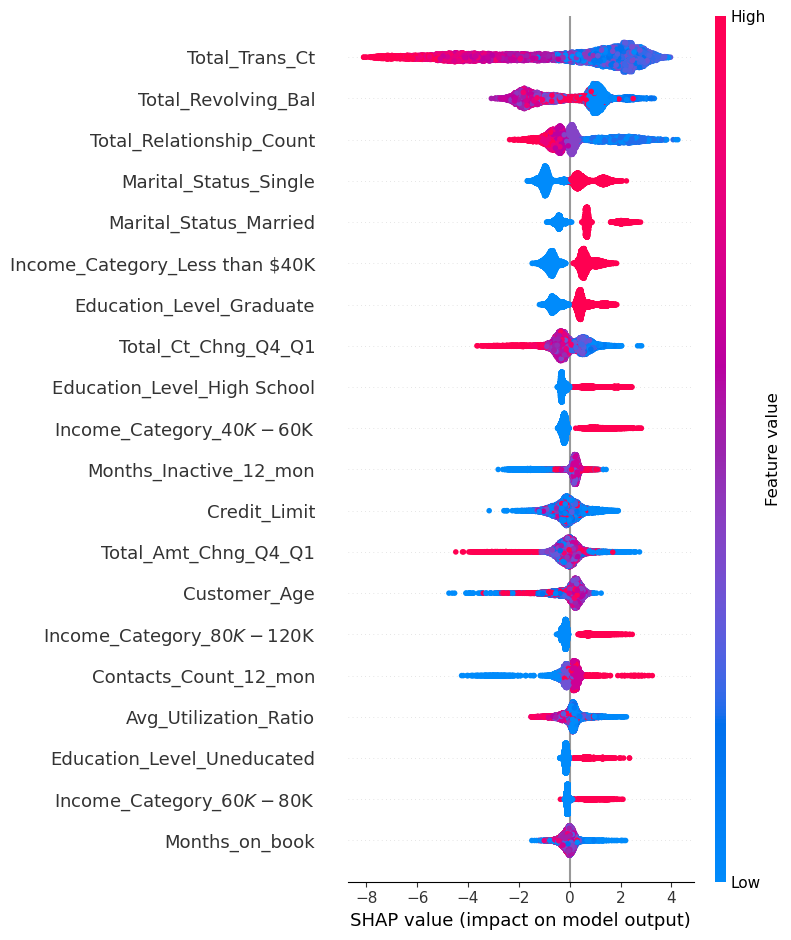

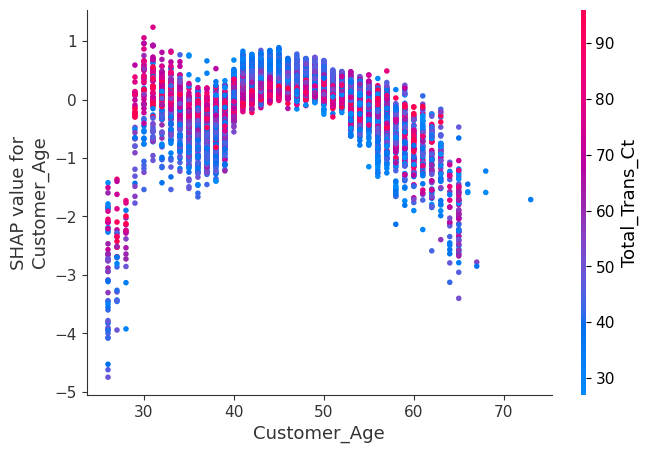

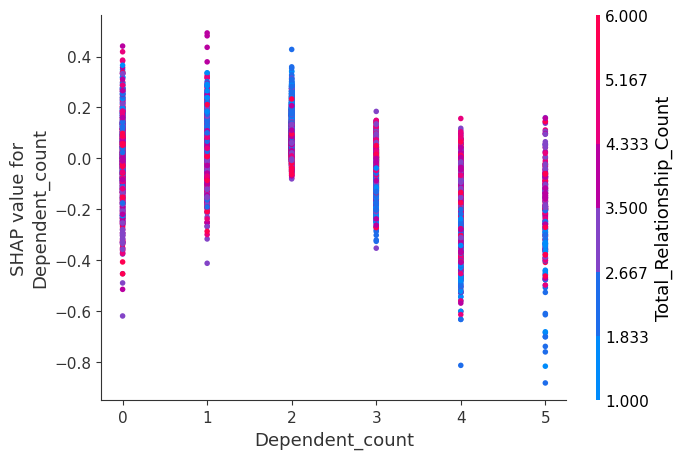

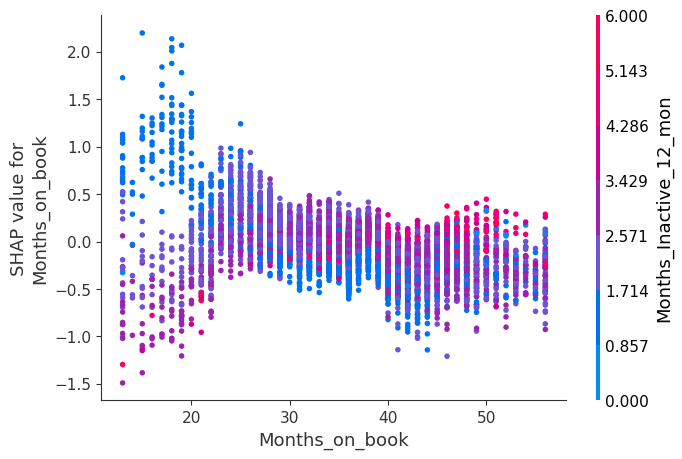

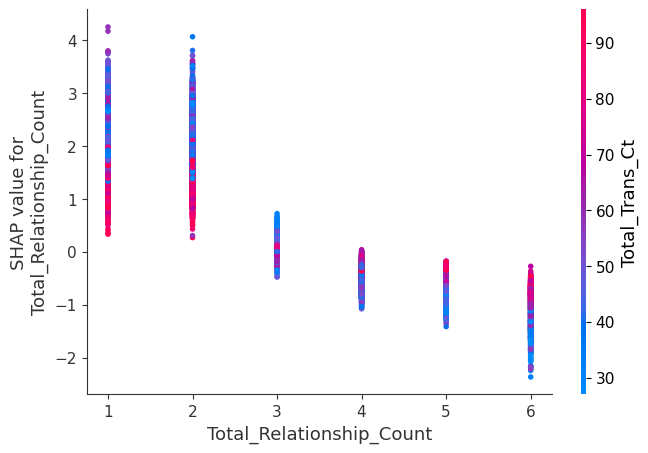

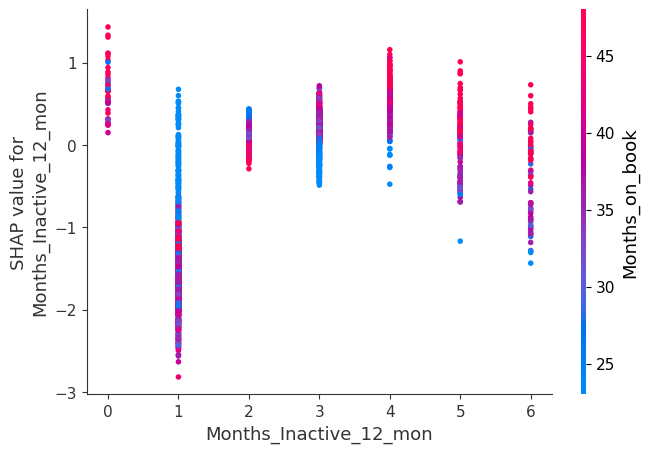

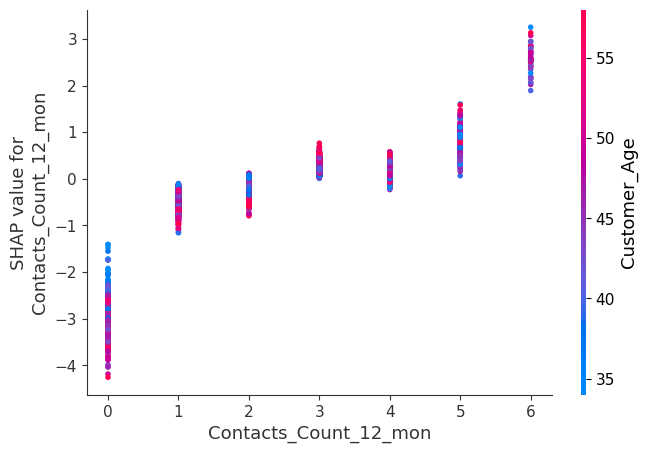

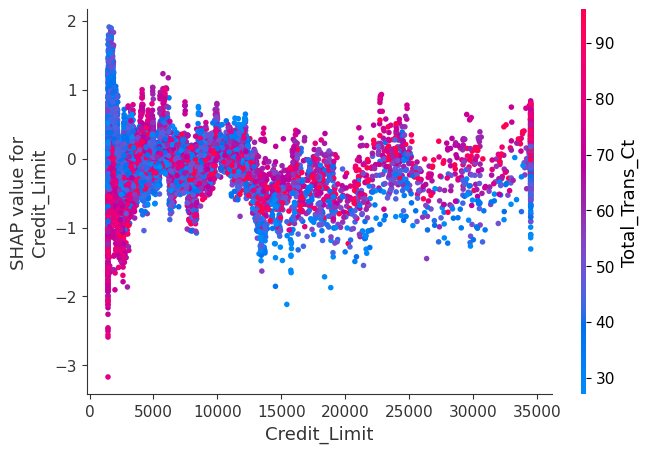

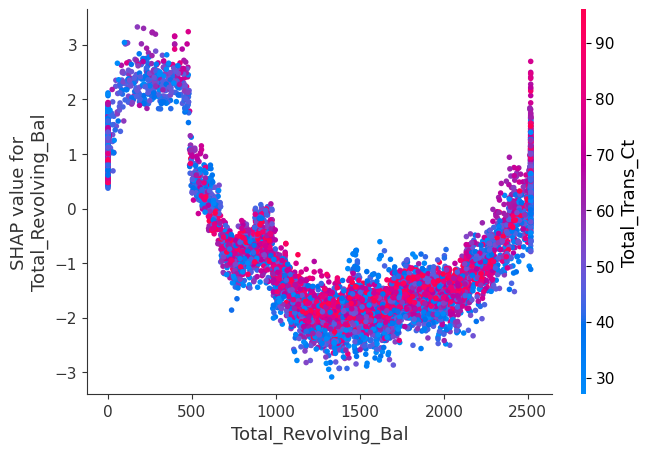

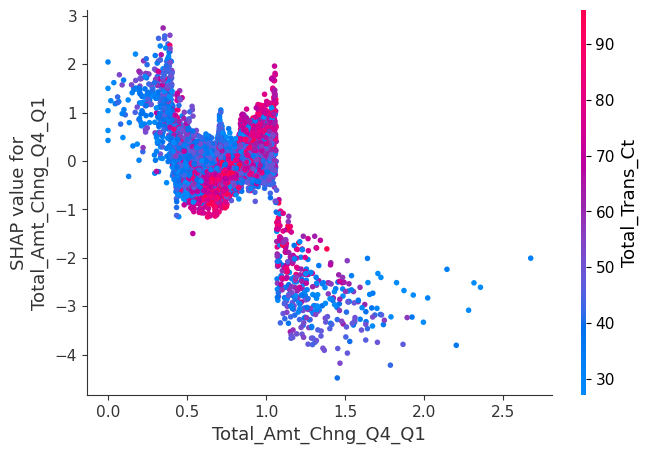

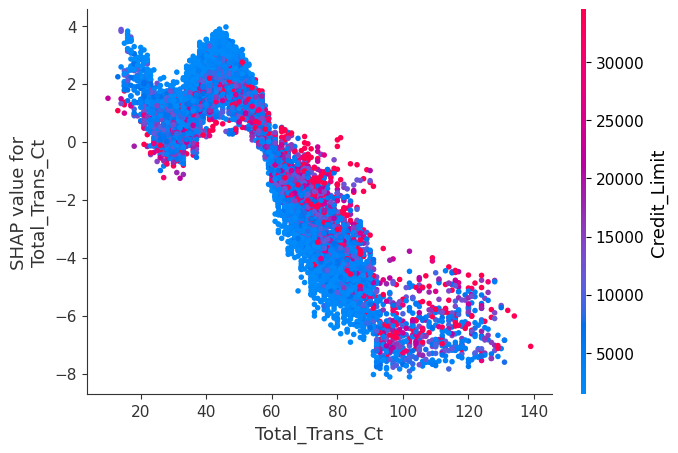

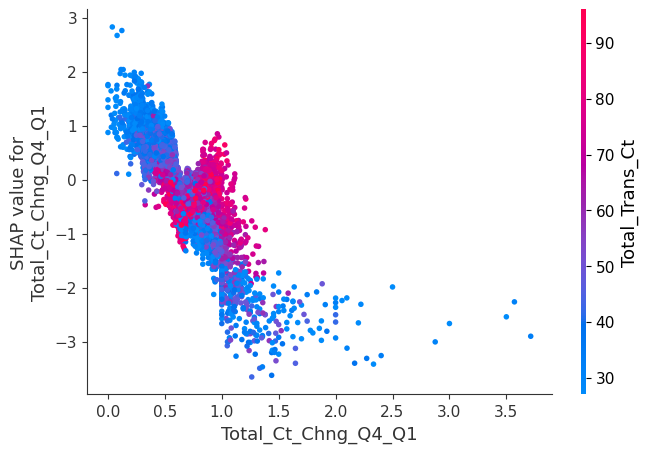

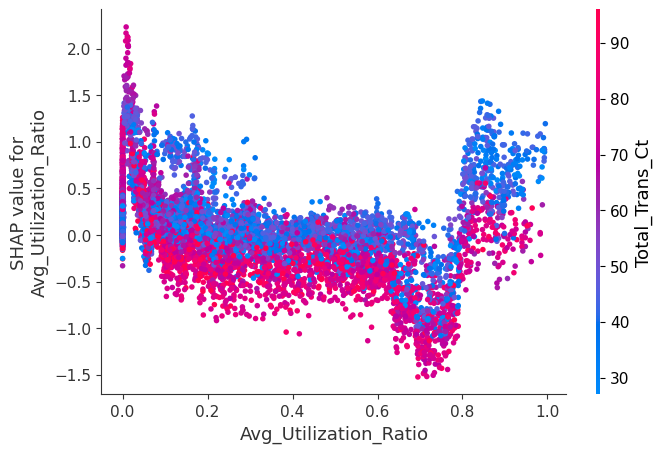

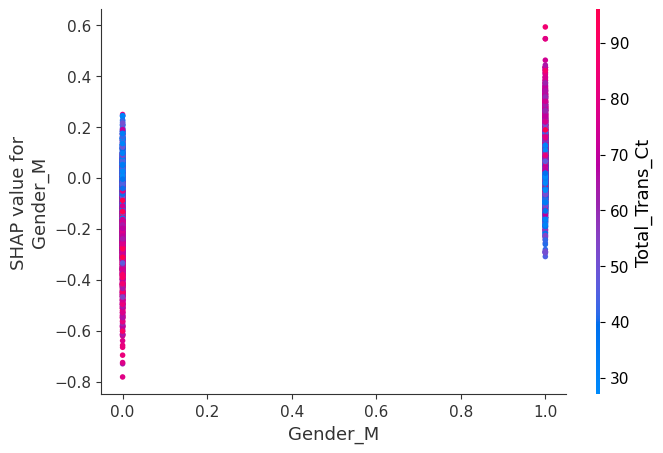

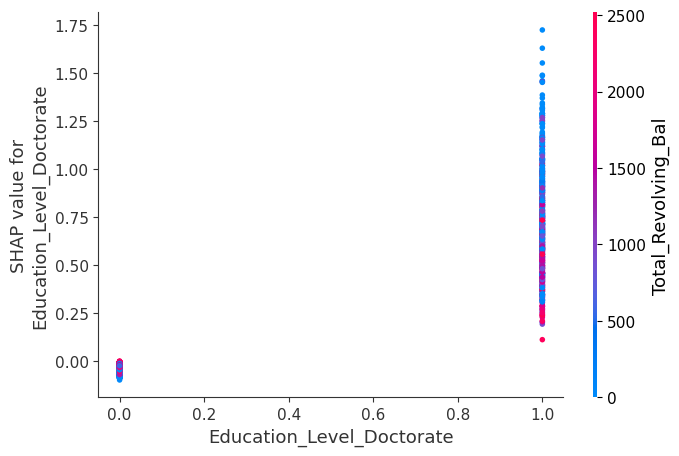

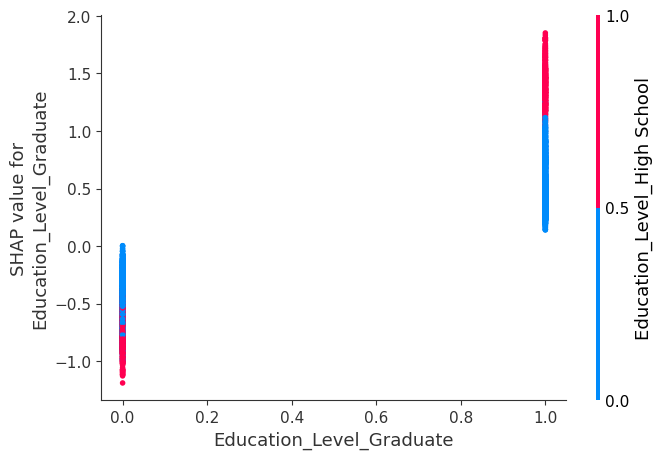

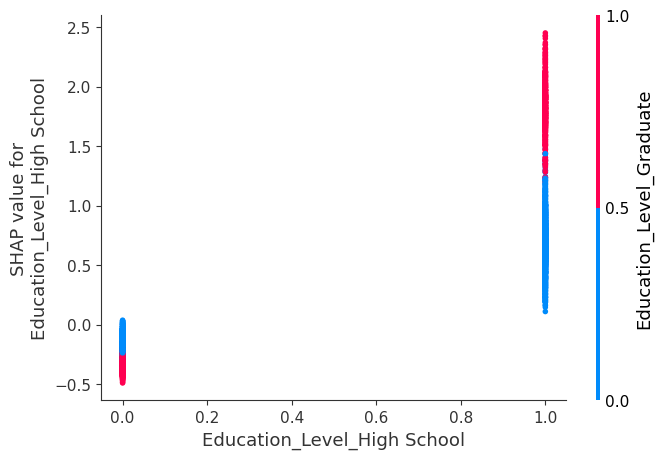

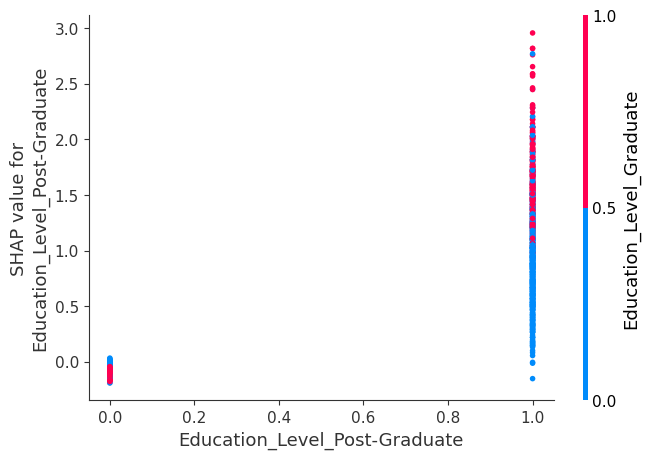

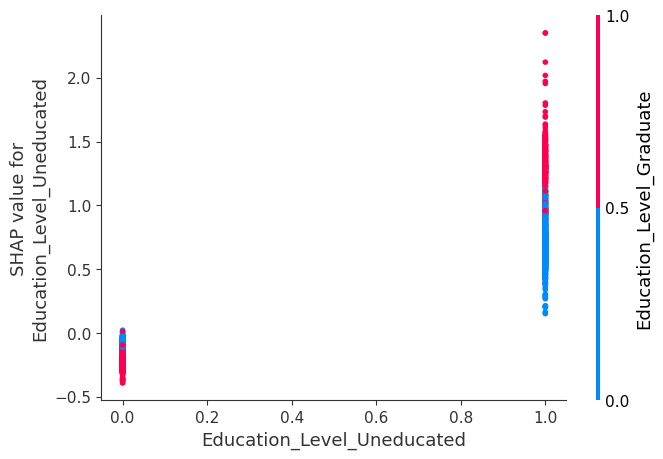

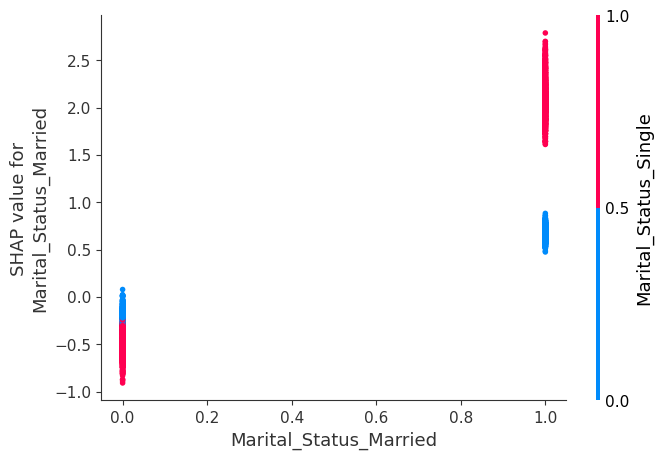

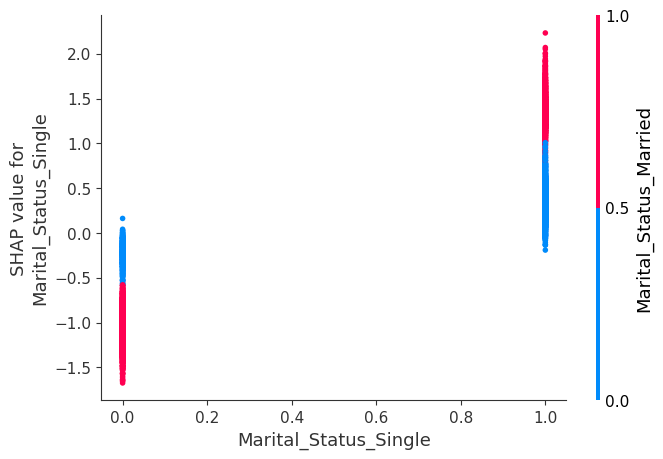

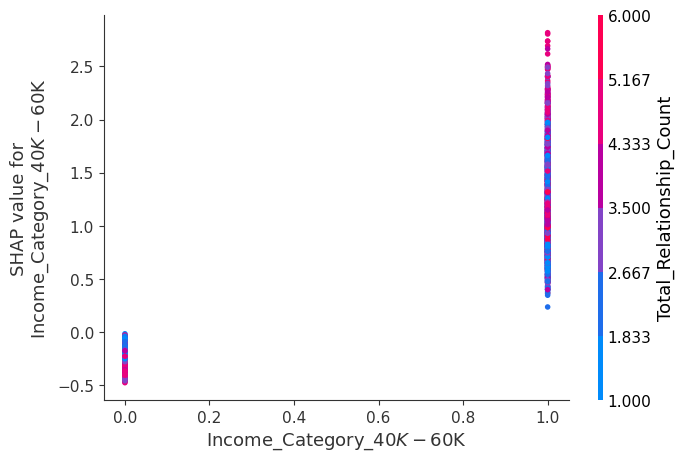

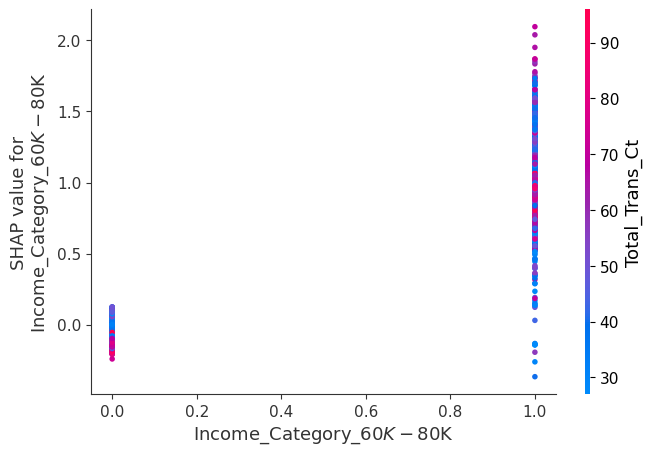

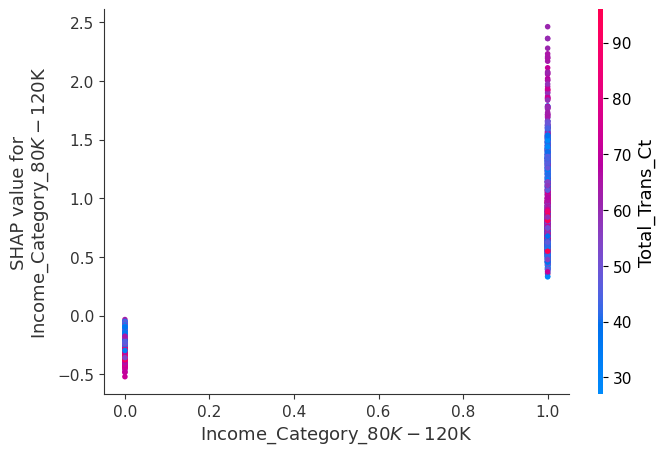

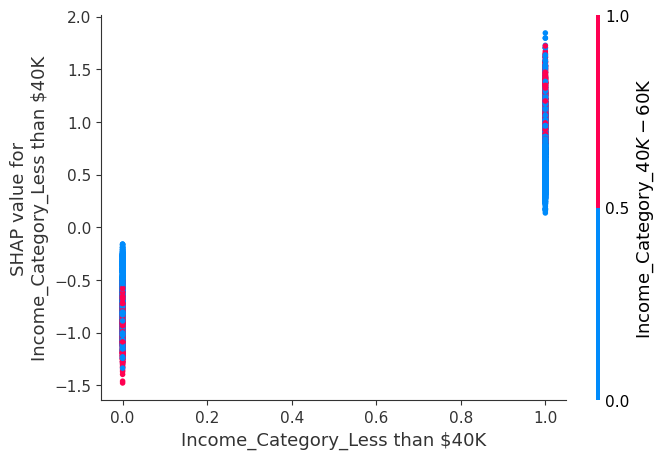

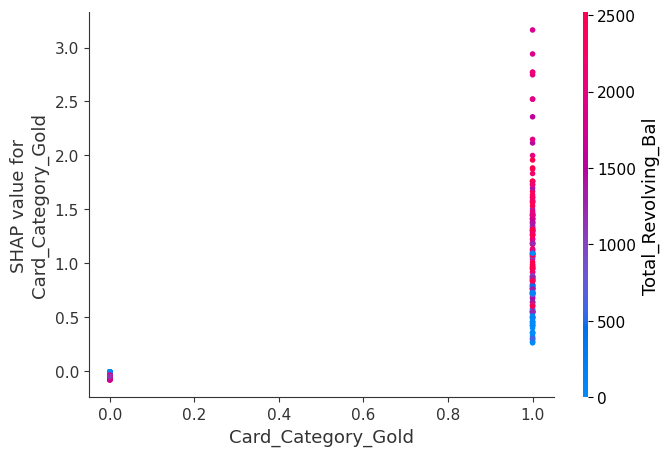

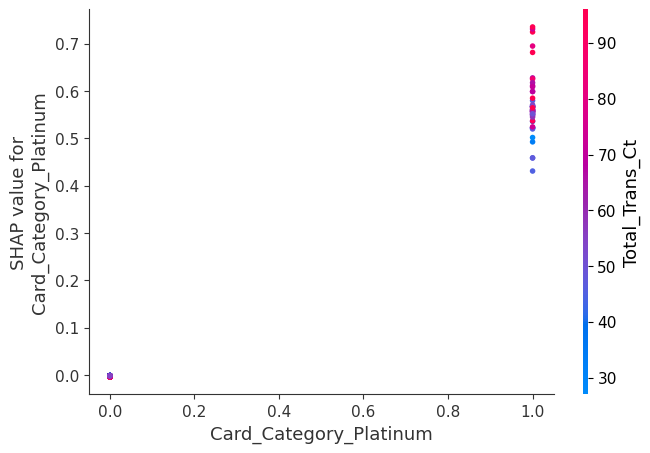

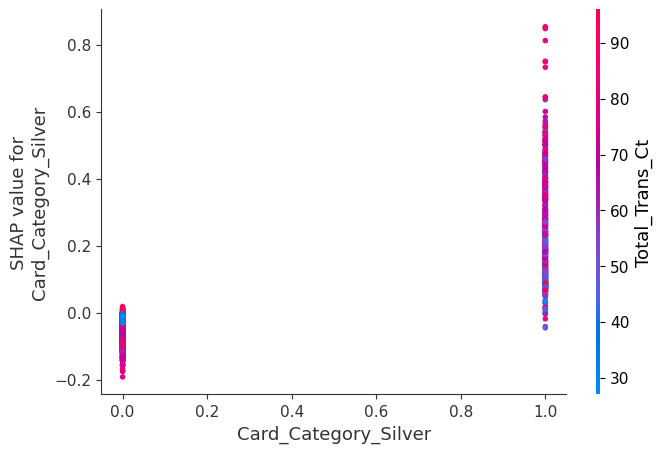

Training Model Name: Bagging, Recall Score: 0.996
Training Model Name: Random forest, Recall Score: 1.000


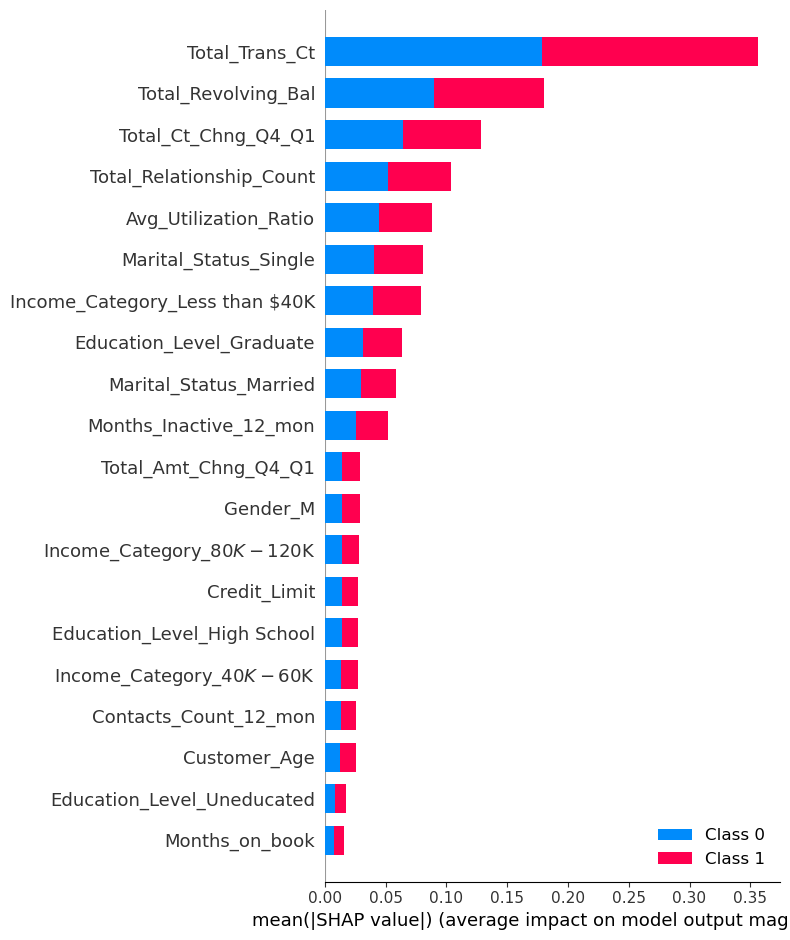

Training Model Name: Adaboost, Recall Score: 0.933
Training Model Name: dtree, Recall Score: 1.000


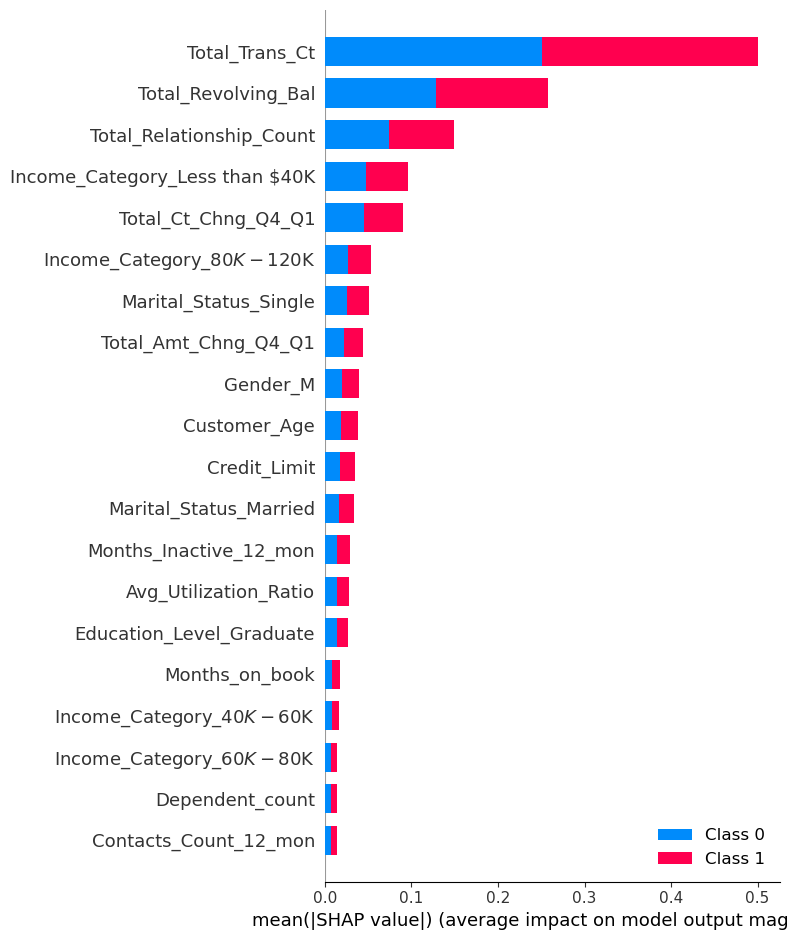

----------------------------------------------------------------------------------------------------

Validation Performance:

Model Name: Xgboost, Recall Score: 0.791
Model Name: Bagging, Recall Score: 0.733
Model Name: Random forest, Recall Score: 0.779
Model Name: Adaboost, Recall Score: 0.825
Model Name: dtree, Recall Score: 0.739


In [70]:
Build_Train_Valid_PerformanceWithSHAP("Oversampling Data",X_train_over,y_train_over,X_val,y_val)

### Model Building with Undersampled data

In [71]:
# Random undersampler for under sampling the data
# needs to be done before modeling
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<span style="color:blue">
<h3>Undersampling Majority Class<h3>
<ul>
<li>Data has been reduce for our majority class to the same number as minority class, as our strategy=1,which is to get sample number of minority class=1 same as the majority class=0 </li>
</ul>
</span>

In [72]:
print(f"Original Class 1: {np.sum(y_train == 1):.2f} Class 0: {sum(y_train == 0):.2f}")
print(f"Original Shape X_Train : {X_train.shape[0]} y_train :{y_train.shape[0]}")
print(f"Under Sample Class 1: {sum(y_train_un == 1):.2f} Class 0: {sum(y_train_un == 0):.2f}")
print(f"Under Sample Shape X_Train : {X_train_un.shape[0]} y_train :{X_train_un.shape[0]} y_train/2 :{X_train_un.shape[0]/2} -> Same as Original Class 1 (Minority)")

Original Class 1: 976.00 Class 0: 5099.00
Original Shape X_Train : 6075 y_train :6075
Under Sample Class 1: 976.00 Class 0: 976.00
Under Sample Shape X_Train : 1952 y_train :1952 y_train/2 :976.0 -> Same as Original Class 1 (Minority)


(1952, 27) (1952,)
Sampling Type: Under Sampling Data

Training Performance:

Training Model Name: Xgboost, Recall Score: 1.000


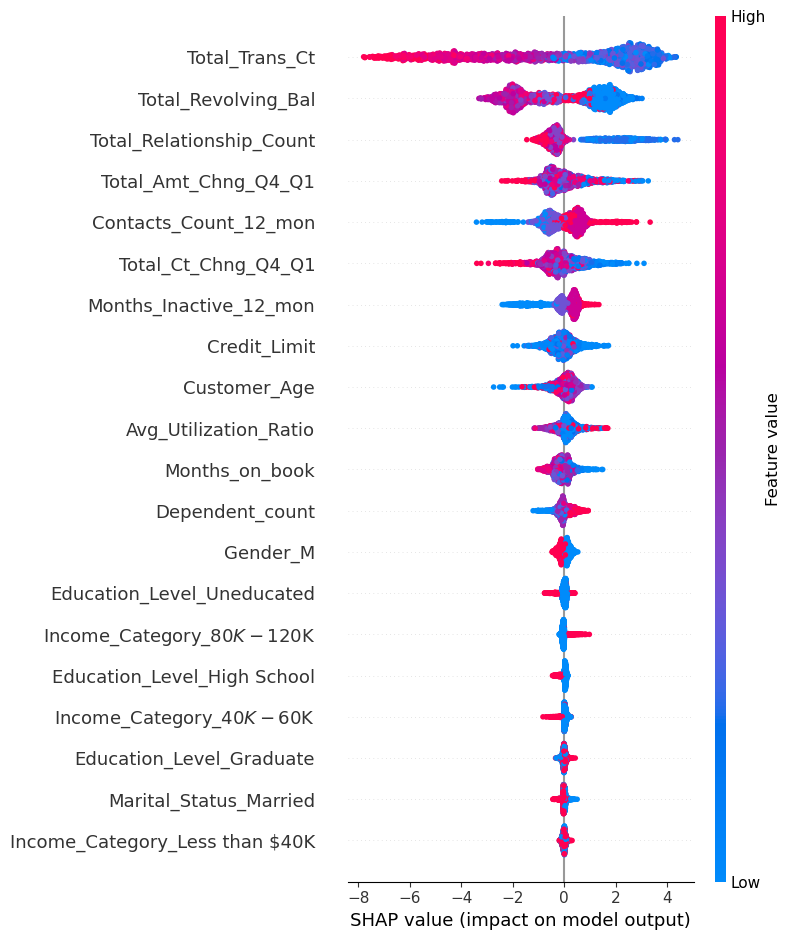

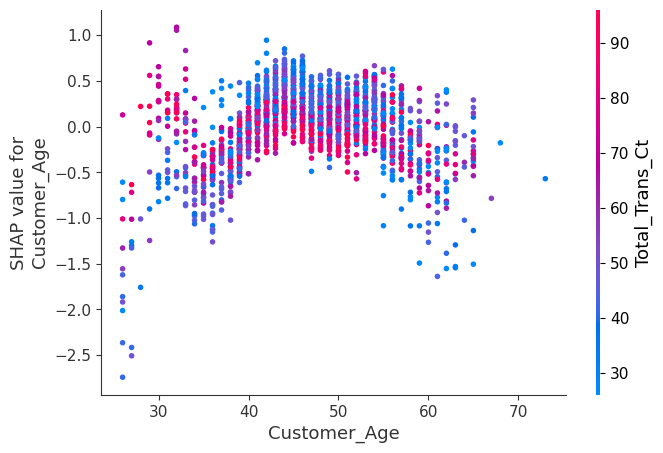

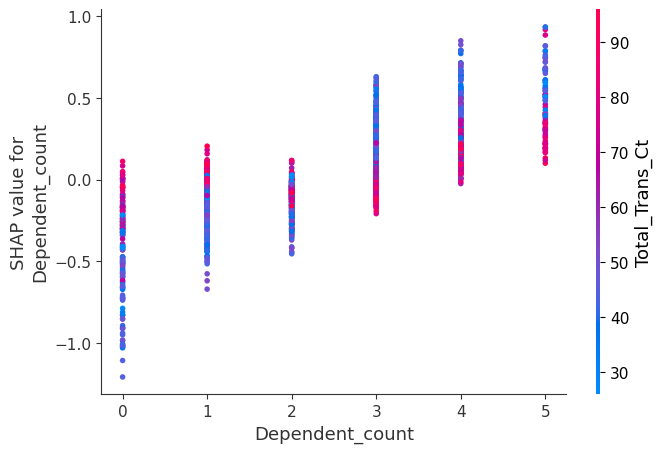

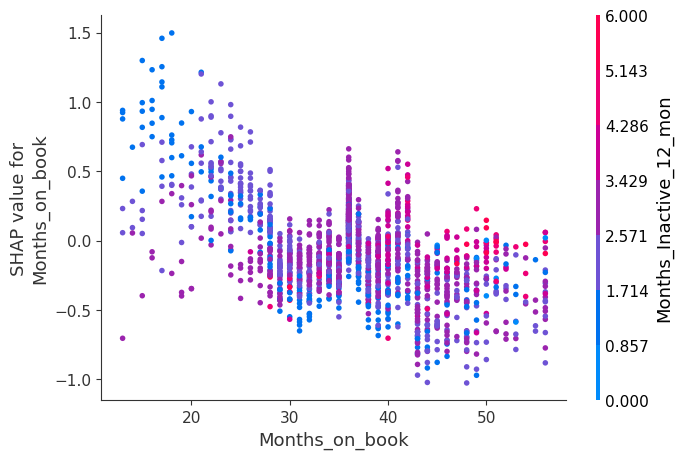

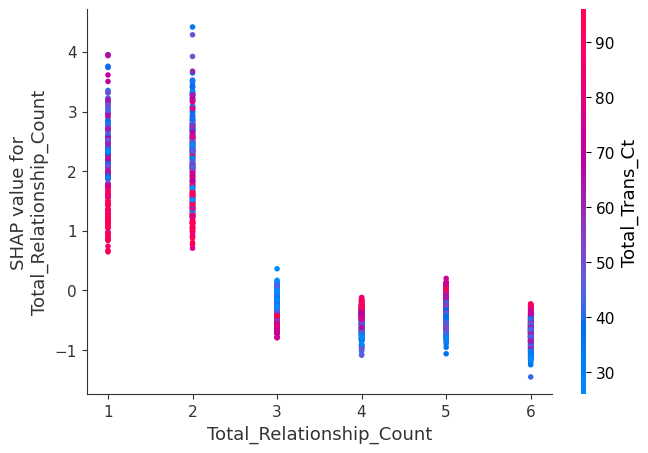

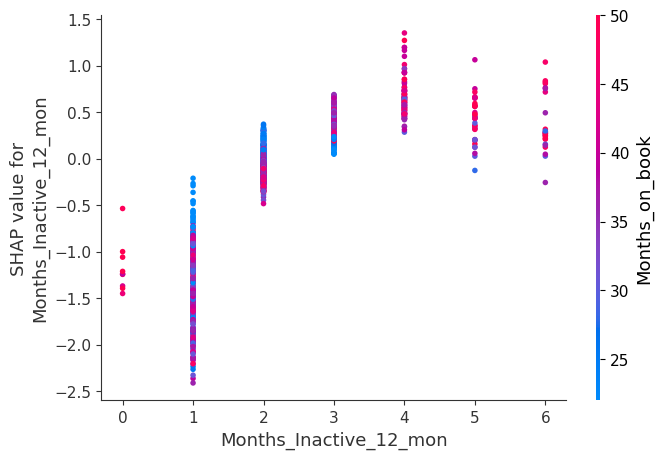

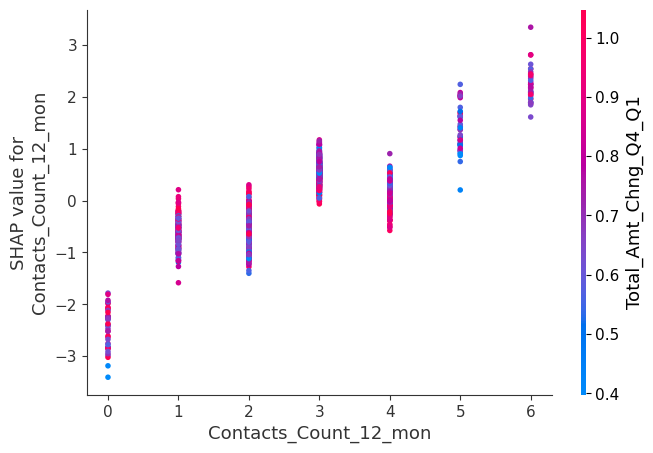

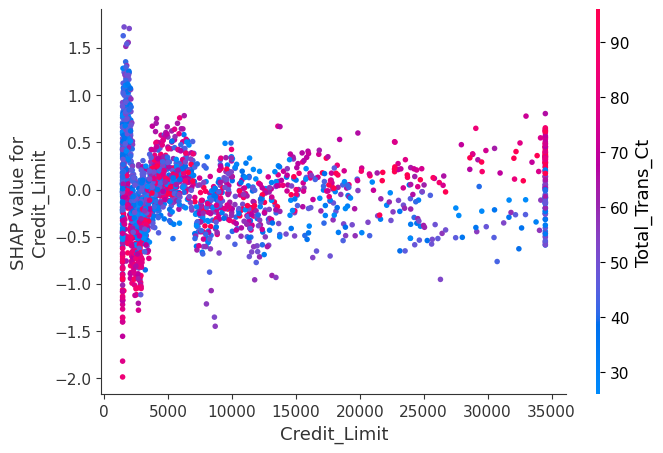

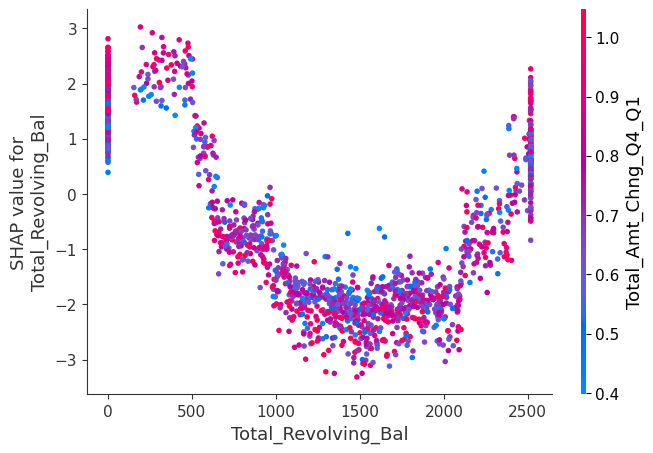

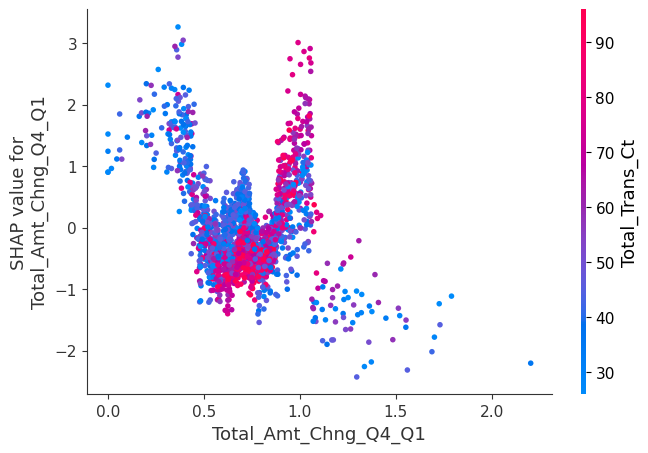

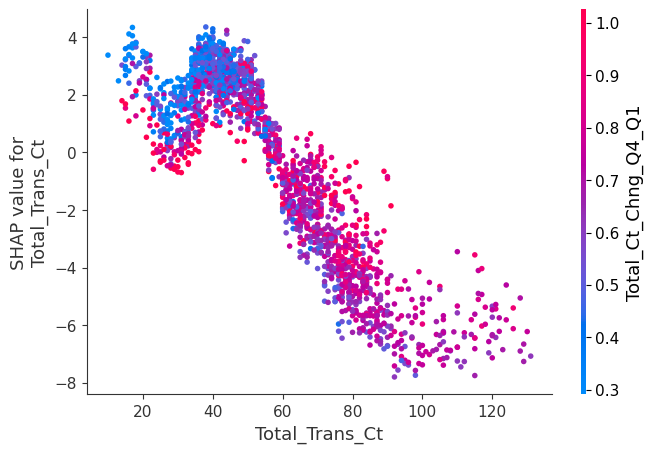

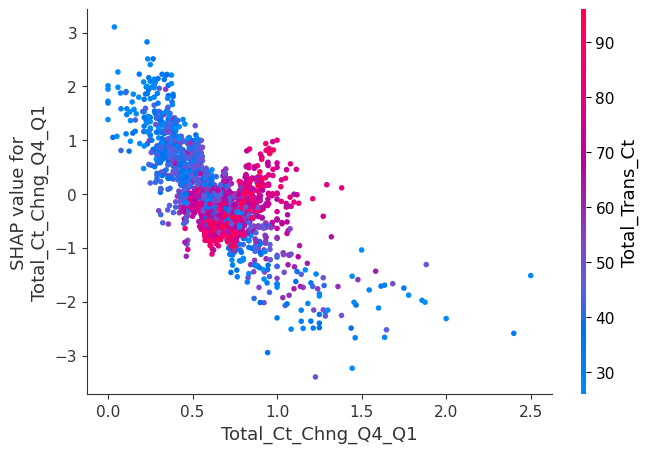

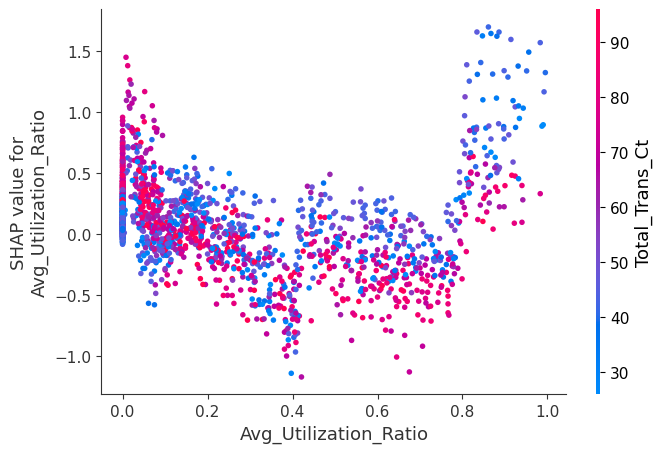

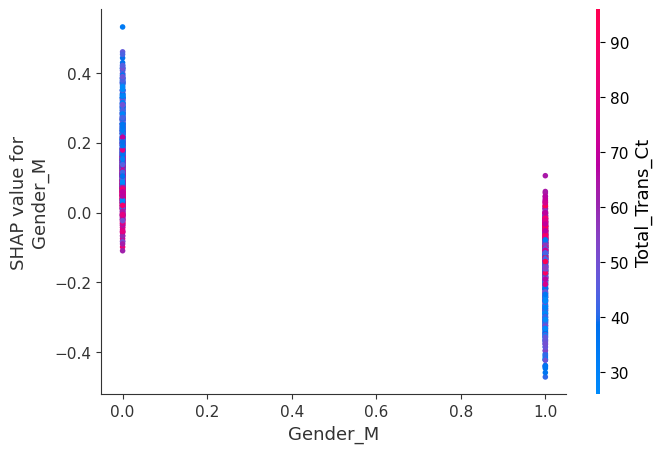

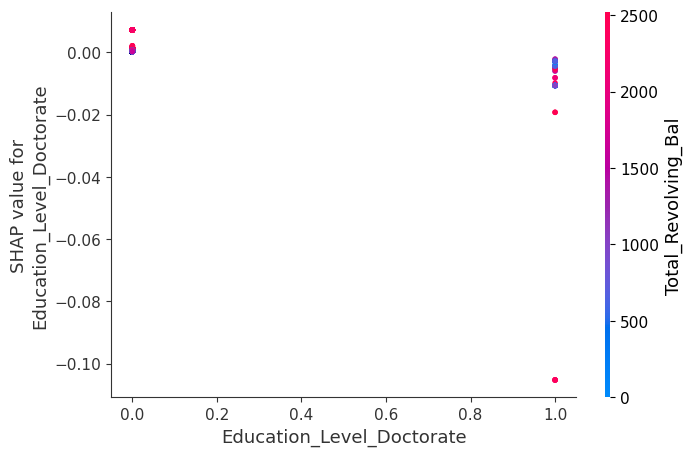

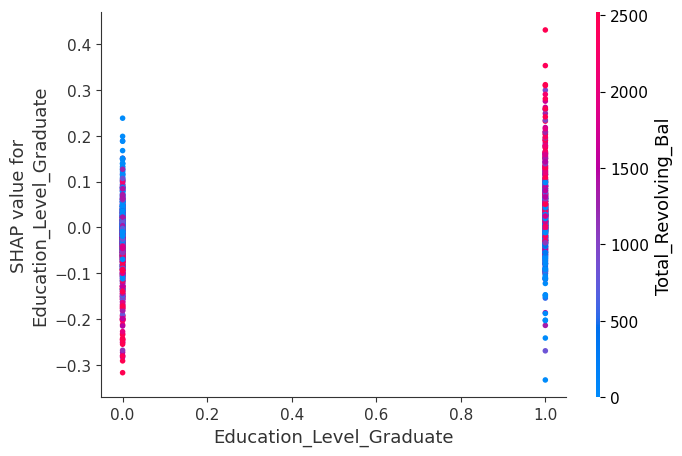

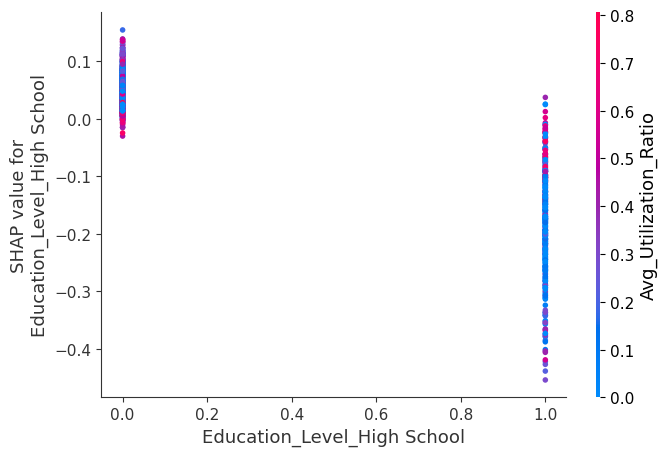

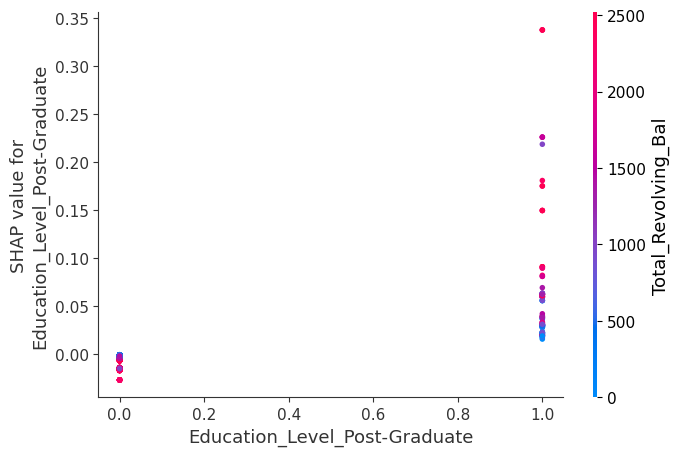

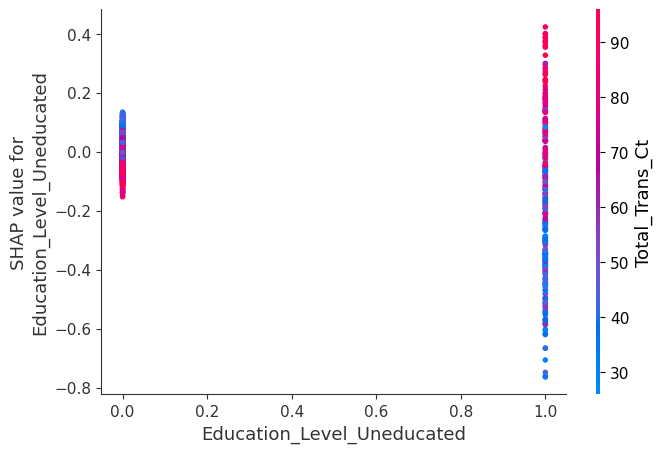

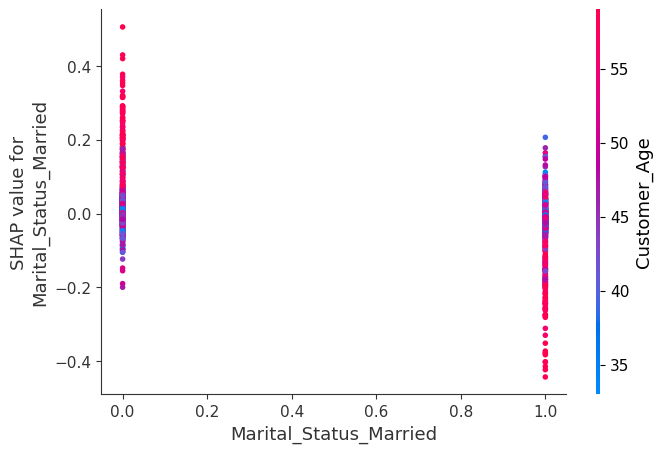

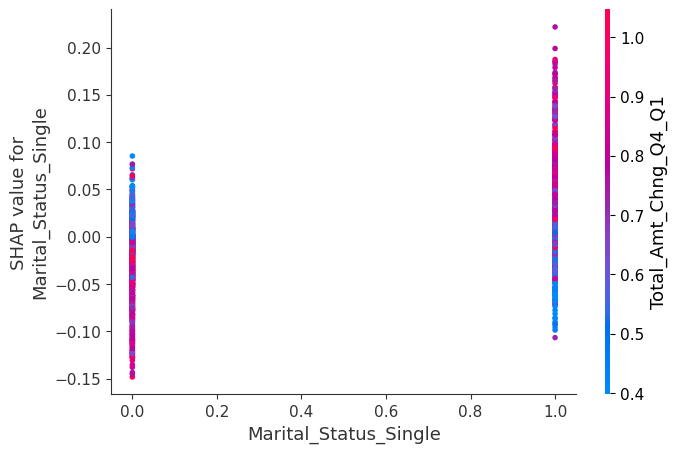

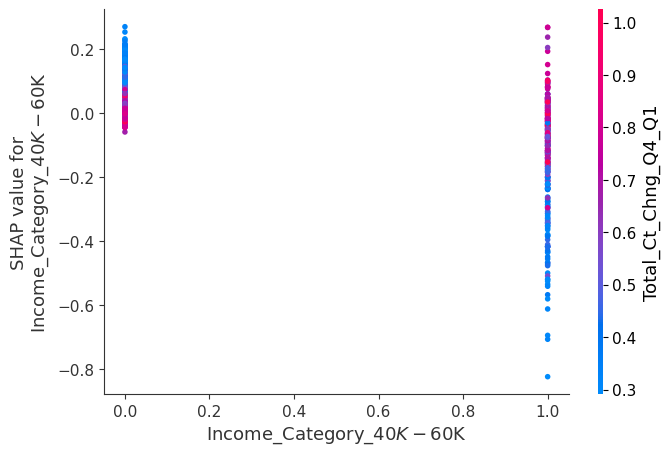

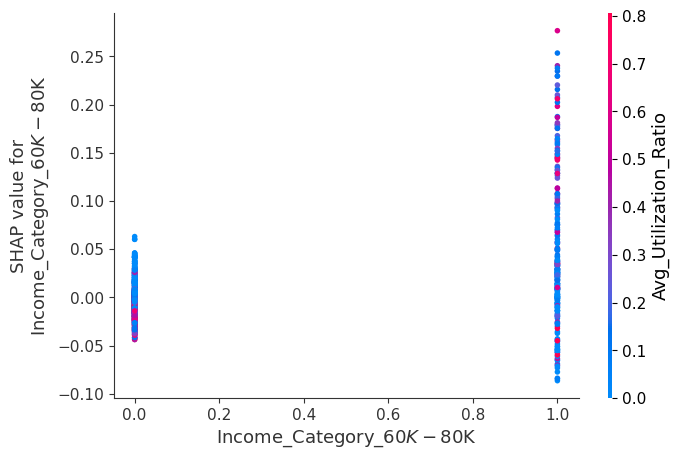

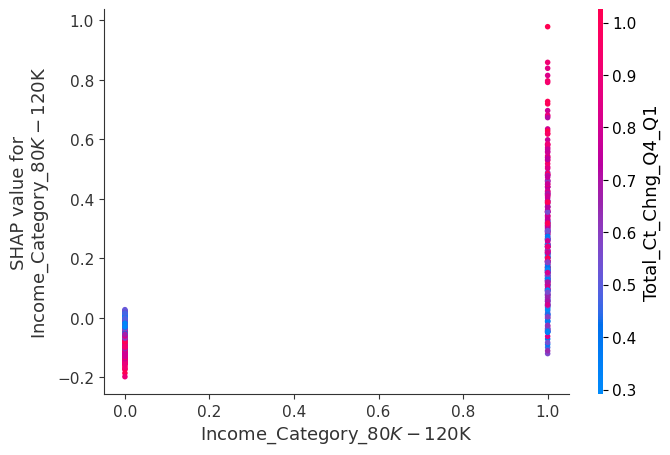

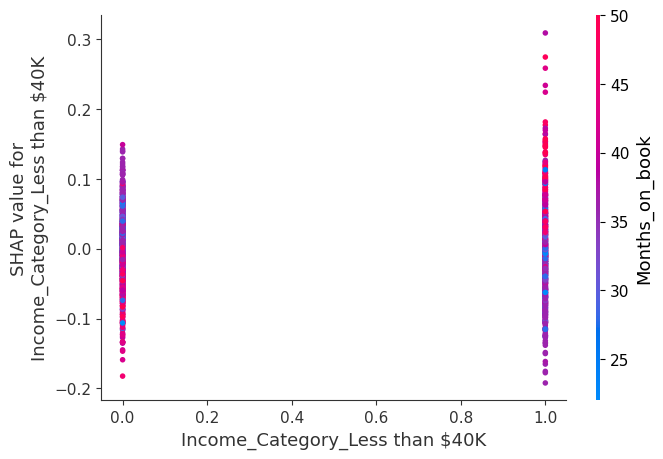

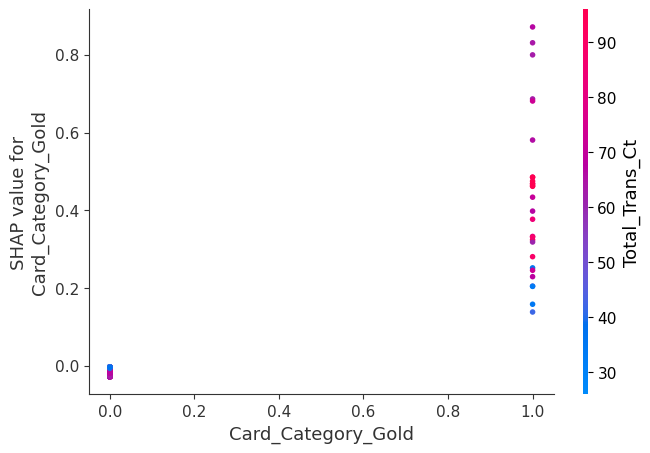

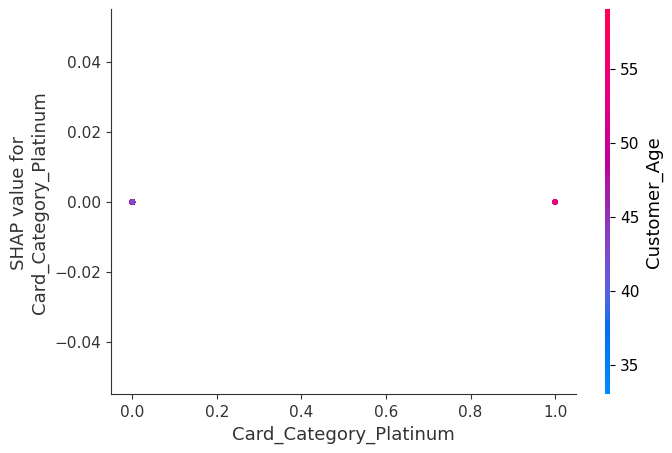

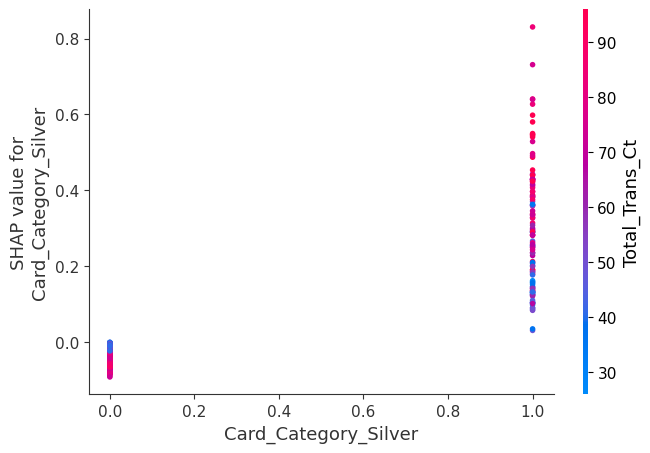

Training Model Name: Bagging, Recall Score: 0.983
Training Model Name: Random forest, Recall Score: 1.000


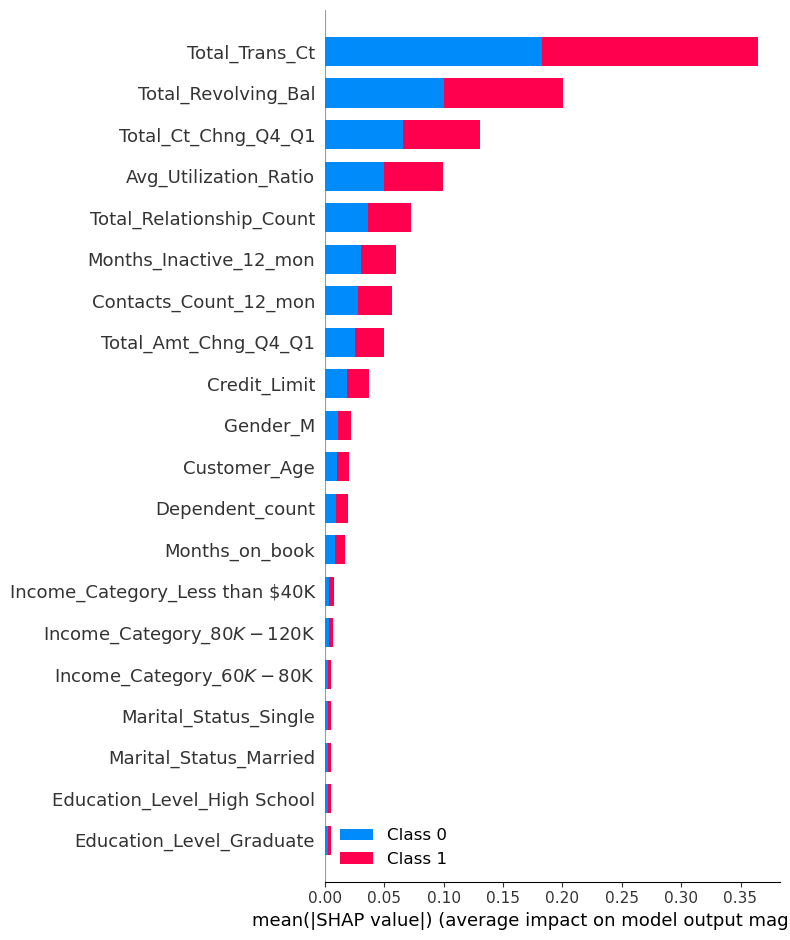

Training Model Name: Adaboost, Recall Score: 0.894
Training Model Name: dtree, Recall Score: 1.000


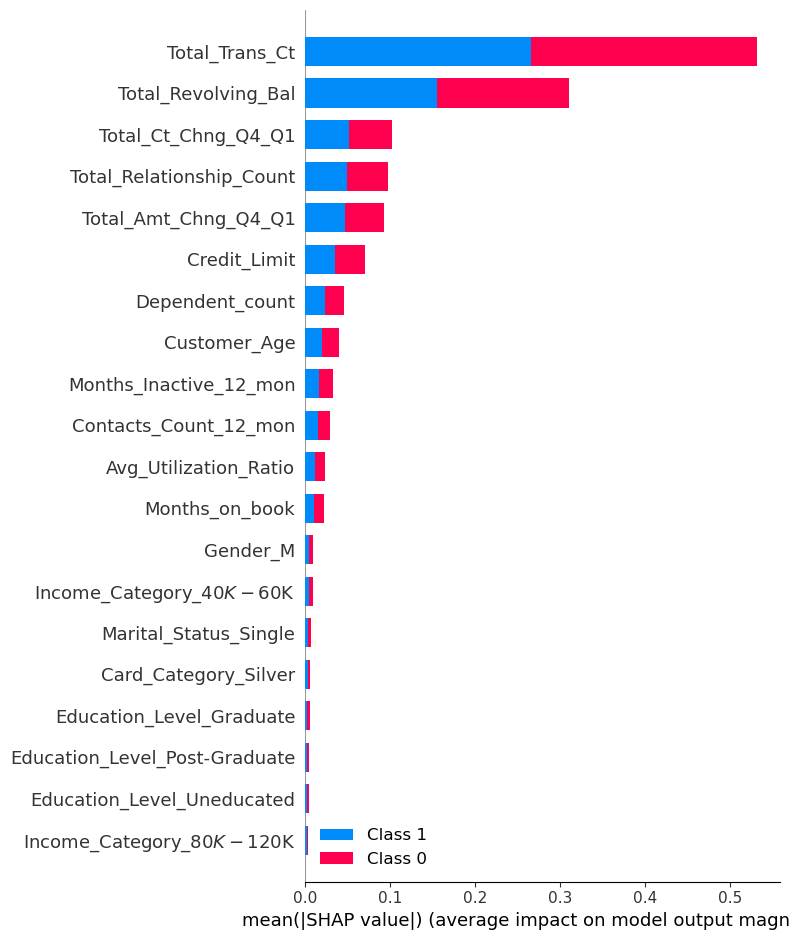

----------------------------------------------------------------------------------------------------

Validation Performance:

Model Name: Xgboost, Recall Score: 0.908
Model Name: Bagging, Recall Score: 0.847
Model Name: Random forest, Recall Score: 0.890
Model Name: Adaboost, Recall Score: 0.896
Model Name: dtree, Recall Score: 0.822


In [73]:
Build_Train_Valid_PerformanceWithSHAP("Under Sampling Data",X_train_un,y_train_un,X_val,y_val)

### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

#### Sample tuning method for Decision tree with original data

In [74]:
def display_feature_importance(name,model,X_train):
    """
    This function plots feature importance for a ml model
    
    name: name of the model
    model: model class instance
    X_train: training data
    """
    
    if name in ["Bagging"]: # not supported for bagging
        return
            
    print(f"display_feature_importance {name}")
    feature_names = X_train.columns
    importances = model.feature_importances_[:10]
    indices = np.argsort(importances)

    
    plt.figure(figsize=(5, 5))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

In [75]:
def Model_Tunning(msg,X_train,y_train,X_Val,y_val):
    """
    This is a single function that tunes multiple models stored in models list.
    Hyper parameters for each model are stored in param_grid as a dict
    Even though we use recall_score to calculate recall we ignore this as potentially overfitting code (this is not optimized/tunned)
    Instead we use recall score from best model using random search cv, we are using recall to optimize as defined in scorer
    It also shows feature importance on test data display_feature_importance
    
    msg: Message any descriptive text
    X_train: training data
    y_train: training target
    X_Val: validation data
    y_val: validatoin target

    returns a list of tuples with name of the mode, randomsearchcv best esitmator, randomsearch cv best params
        (name, randomized_cv.best_estimator_,randomized_cv.best_params_)
    """
    scorer = metrics.make_scorer(metrics.recall_score)
    param_grid = { "dtree": {'max_depth': np.arange(2,6),
                              'min_samples_leaf': [1, 4, 7],
                              'max_leaf_nodes' : [10,15],
                              'min_impurity_decrease': [0.0001,0.001] },
                    "Adaboost": {
                        "n_estimators": np.arange(75,150,25),
                        "learning_rate": [0.1, 0.01, 0.2, 0.05, 1]
                        
                        },
                    "Bagging": {
                        'max_samples': [0.8,0.9,1],
                        'max_features': [0.7,0.8,0.9],
                        'n_estimators' : [30,50,70]
                    },
                    "Random forest": {
                        "n_estimators": [200,250,300],
                        "min_samples_leaf": np.arange(1, 4),
                        "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
                        "max_samples": np.arange(0.4, 0.7, 0.1)
                    },
                    "Xgboost": {
                       'n_estimators':np.arange(50,300,50),
                       'scale_pos_weight':[0,1,2,5,10],
                       'learning_rate':[0.01,0.1,0.2,0.05],
                       'gamma':[0,1,3,5],
                       'subsample':[0.7,0.8,0.9,1]
                    }
                }
    
    models = []  # Empty list to store all the models
    
    # Appending models into the list
    models.append(("Bagging", BaggingClassifier(random_state=1)))
    models.append(("Random forest", RandomForestClassifier(random_state=1)))
    
    # Appending models into the list
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
    models.append(("dtree", DecisionTreeClassifier(random_state=1)))
    
    print(f"Sampling Type: {msg}")
    print("\nTraining Performance:\n")
    best_models = []
    best_scores = []
    for name, model in models:
        
        randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
        
        #Fitting parameters in RandomizedSearchCV
        randomized_cv.fit(X_train,y_train)
        
        best_scores.append((msg,name,"train",randomized_cv.best_score_,randomized_cv.best_params_)) #capture training scores of cv
        
        best_models.append((name, randomized_cv.best_estimator_,randomized_cv.best_params_))
        scores_train = recall_score(y_train, randomized_cv.best_estimator_.predict(X_train))
        print(f"{msg} {name} train recall score {scores_train}  CV Recall Score={randomized_cv.best_score_}")
        
        display_feature_importance(name,randomized_cv.best_estimator_,X_train)
        
        
    print("-"*100)
    print("\nValidation Performance:\n")
    
    for name, best_model,best_param in best_models:
        scores_val = recall_score(y_val, best_model.predict(X_val))
        #print(f"Model Name: {name}, Recall Score: {scores_val:.3f} Best Params {best_param}")
        print(f"{msg} {name} val recall score {scores_val}  CV Recall Score={randomized_cv.best_score_}")
        best_scores.append((msg,name,"val",randomized_cv.best_score_,best_param)) #capture validation score of cv
    return best_scores        
            
   


Sampling Type: Original

Training Performance:

Original Bagging train recall score 0.9979508196721312  CV Recall Score=0.6464887493458922
Original Random forest train recall score 0.9590163934426229  CV Recall Score=0.6219099947671376
display_feature_importance Random forest


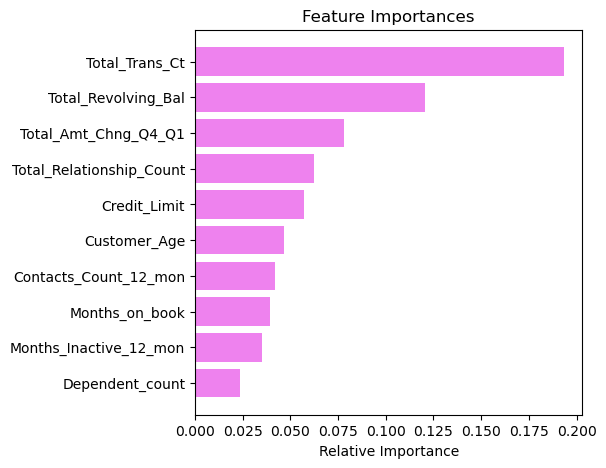

Original Adaboost train recall score 0.7387295081967213  CV Recall Score=0.6997854526425955
display_feature_importance Adaboost


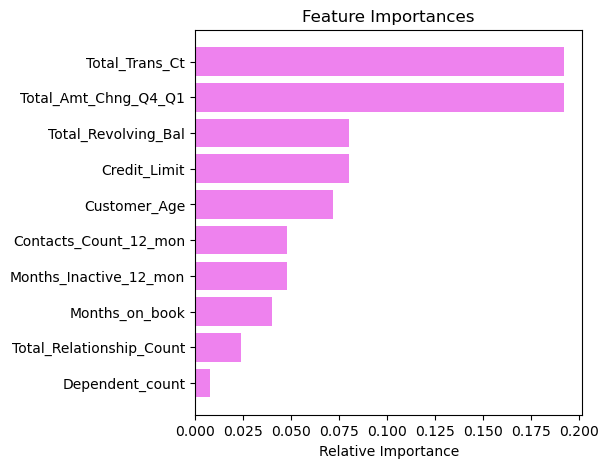

Original Xgboost train recall score 0.9631147540983607  CV Recall Score=0.8422239665096807
display_feature_importance Xgboost


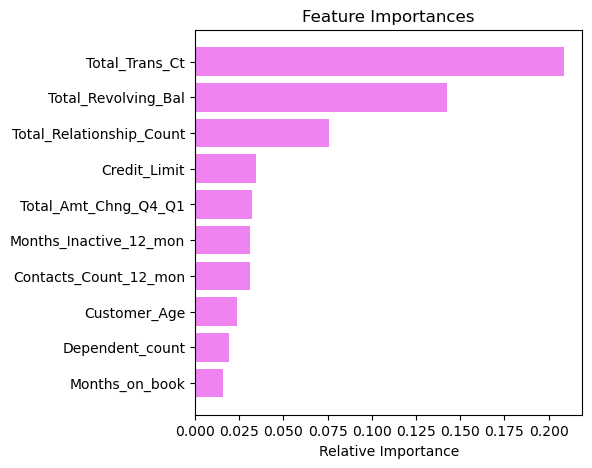

Original dtree train recall score 0.6086065573770492  CV Recall Score=0.6014338042909471
display_feature_importance dtree


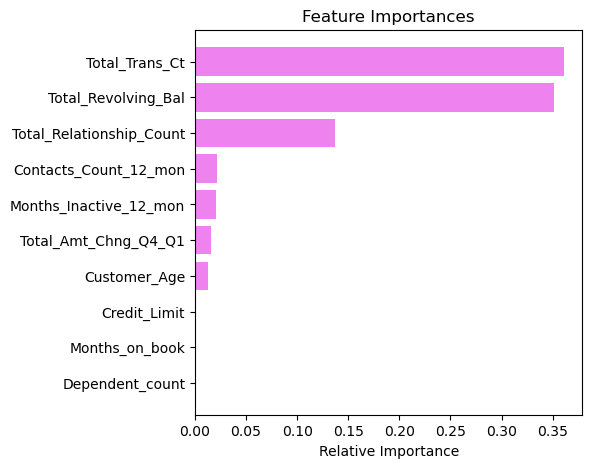

----------------------------------------------------------------------------------------------------

Validation Performance:

Original Bagging val recall score 0.6840490797546013  CV Recall Score=0.6014338042909471
Original Random forest val recall score 0.6809815950920245  CV Recall Score=0.6014338042909471
Original Adaboost val recall score 0.7300613496932515  CV Recall Score=0.6014338042909471
Original Xgboost val recall score 0.8588957055214724  CV Recall Score=0.6014338042909471
Original dtree val recall score 0.6165644171779141  CV Recall Score=0.6014338042909471


In [76]:
best_scores_original = Model_Tunning("Original",X_train,y_train,X_val,y_val)

Sampling Type: Oversampling Data

Training Performance:

Oversampling Data Bagging train recall score 1.0  CV Recall Score=0.9478398660740057
Oversampling Data Random forest train recall score 0.9994116493430084  CV Recall Score=0.9421532067193905
display_feature_importance Random forest


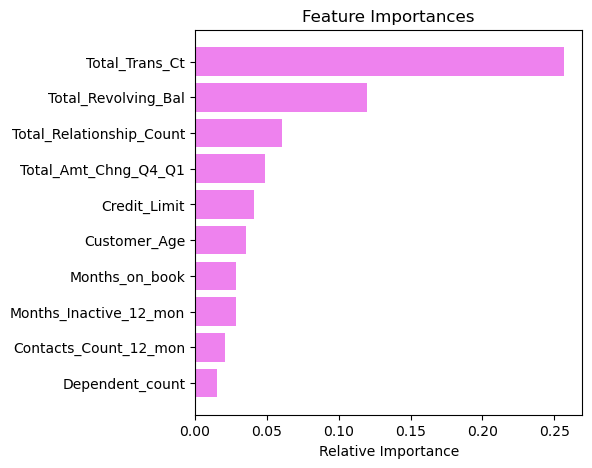

Oversampling Data Adaboost train recall score 0.9197881937634831  CV Recall Score=0.8966562758567607
display_feature_importance Adaboost


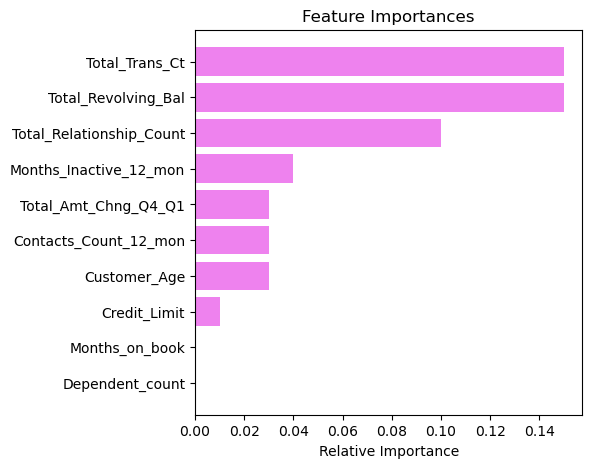

Oversampling Data Xgboost train recall score 0.9984310649146891  CV Recall Score=0.9798027670341934
display_feature_importance Xgboost


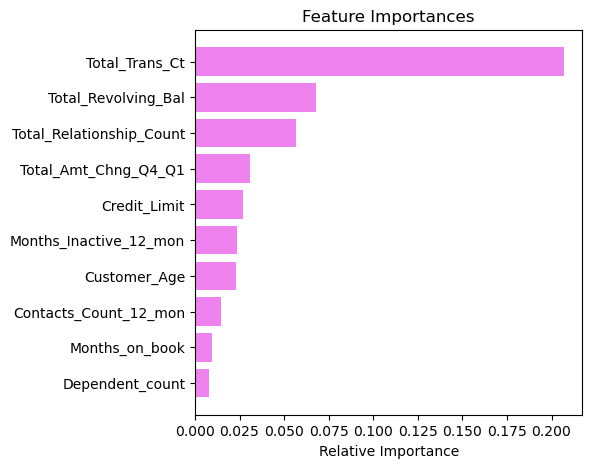

Oversampling Data dtree train recall score 0.8666405177485782  CV Recall Score=0.880959610537051
display_feature_importance dtree


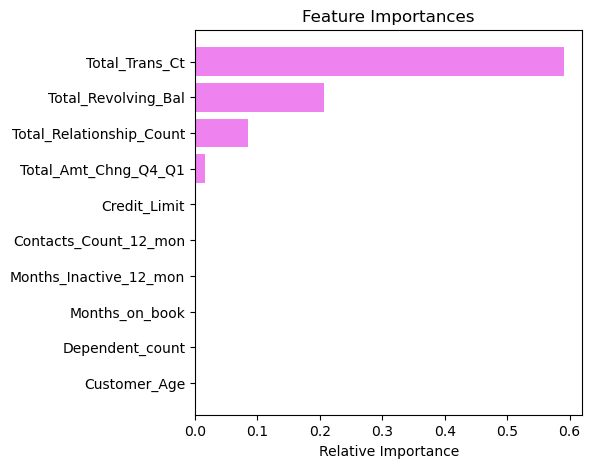

----------------------------------------------------------------------------------------------------

Validation Performance:

Oversampling Data Bagging val recall score 0.7484662576687117  CV Recall Score=0.880959610537051
Oversampling Data Random forest val recall score 0.7944785276073619  CV Recall Score=0.880959610537051
Oversampling Data Adaboost val recall score 0.8374233128834356  CV Recall Score=0.880959610537051
Oversampling Data Xgboost val recall score 0.9202453987730062  CV Recall Score=0.880959610537051
Oversampling Data dtree val recall score 0.8190184049079755  CV Recall Score=0.880959610537051


In [77]:
best_scores_over_sampling = Model_Tunning("Oversampling Data",X_train_over,y_train_over,X_val,y_val)

Sampling Type: Under Sampling Data

Training Performance:

Under Sampling Data Bagging train recall score 1.0  CV Recall Score=1.0
Under Sampling Data Random forest train recall score 0.9959016393442623  CV Recall Score=0.8821664050235478
display_feature_importance Random forest


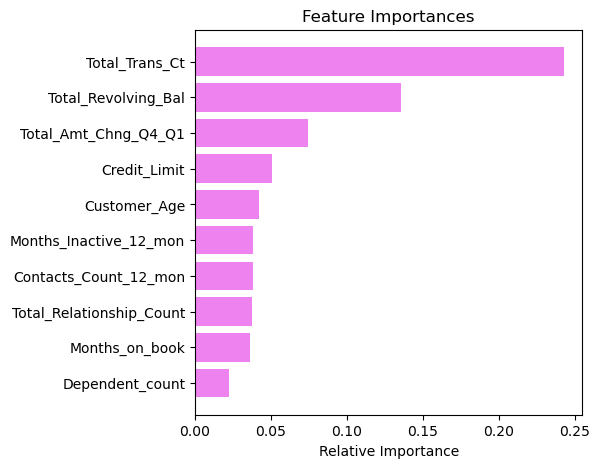

Under Sampling Data Adaboost train recall score 0.9047131147540983  CV Recall Score=0.878079539508111
display_feature_importance Adaboost


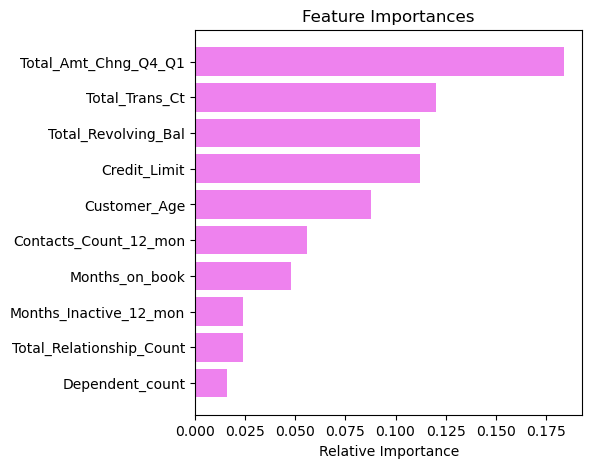

Under Sampling Data Xgboost train recall score 0.9989754098360656  CV Recall Score=0.9538932496075354
display_feature_importance Xgboost


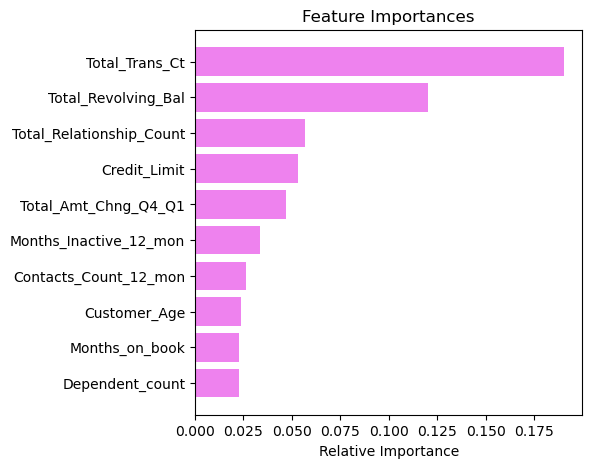

Under Sampling Data dtree train recall score 0.8534836065573771  CV Recall Score=0.8340397697540555
display_feature_importance dtree


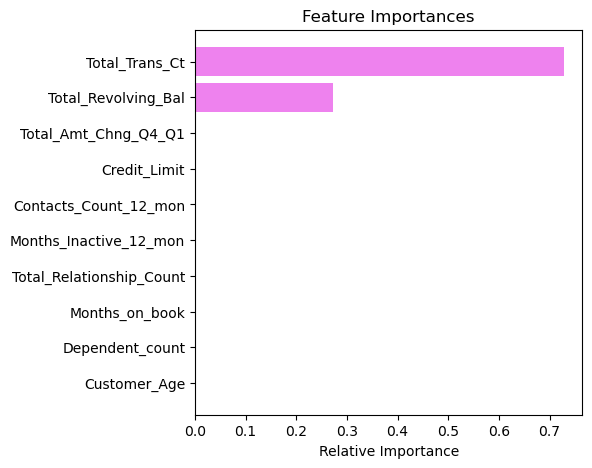

----------------------------------------------------------------------------------------------------

Validation Performance:

Under Sampling Data Bagging val recall score 1.0  CV Recall Score=0.8340397697540555
Under Sampling Data Random forest val recall score 0.8803680981595092  CV Recall Score=0.8340397697540555
Under Sampling Data Adaboost val recall score 0.8803680981595092  CV Recall Score=0.8340397697540555
Under Sampling Data Xgboost val recall score 0.9478527607361963  CV Recall Score=0.8340397697540555
Under Sampling Data dtree val recall score 0.8588957055214724  CV Recall Score=0.8340397697540555


In [78]:
best_scores_under_sampling = Model_Tunning("Under Sampling Data",X_train_un,y_train_un,X_val,y_val)

## Model Comparison and Final Model Selection

In [79]:
# build a new data frame for easy display of all random search cv recall scores by various sampling strategies
models_train_comp_df = pd.concat(
    [pd.DataFrame(best_scores_original, columns=["Sampling", "ModelName","Type","Recall Score","Params"]),
    pd.DataFrame(best_scores_over_sampling, columns=["Sampling", "ModelName", "Type","Recall Score","Params"]),
    pd.DataFrame(best_scores_under_sampling, columns=["Sampling", "ModelName","Type", "Recall Score","Params"])
    ],
    axis=0,
)
sorted_df = models_train_comp_df.sort_values(by=["Recall Score", "ModelName","Type"], ascending=[False, False,False])
sorted_df.reset_index(drop=True, inplace=True)

<span style="color:blue">
<h3>Sorted list of Model Tunning<h3>
<ul>
<li>Data has been sorted by Recall Score, this is best model CV recall score</li>
<li>It is clear Training score is higher than Validation (val) score as it this is generally the case</li>
<li>Params shows the best prameters from CV, this is different for different models</li>
</ul>
</span>

In [80]:
pd.set_option('max_colwidth', None)
display(sorted_df)

Sampling      ModelName   Type  Recall Score  \
0   Under Sampling Data        Bagging  train         1.000   
1     Oversampling Data        Xgboost  train         0.980   
2   Under Sampling Data        Xgboost  train         0.954   
3     Oversampling Data        Bagging  train         0.948   
4     Oversampling Data  Random forest  train         0.942   
5     Oversampling Data       Adaboost  train         0.897   
6   Under Sampling Data  Random forest  train         0.882   
7     Oversampling Data          dtree    val         0.881   
8     Oversampling Data          dtree  train         0.881   
9     Oversampling Data        Xgboost    val         0.881   
10    Oversampling Data  Random forest    val         0.881   
11    Oversampling Data        Bagging    val         0.881   
12    Oversampling Data       Adaboost    val         0.881   
13  Under Sampling Data       Adaboost  train         0.878   
14             Original        Xgboost  train         0.842   
15  Under Sampling Data          dtree    val         0.834   
16  Under Sampling Data          dtree  train         0.834   
17  Under Sampling Data        Xgboost    val         0.834   
18  Under Sampling Data  Random forest    val         0.834   
19  Under Sampling Data        Bagging    val         0.834   
20  Under Sampling Data       Adaboost    val         0.834   
21             Original       Adaboost  train         0.700   
22             Original        Bagging  train         0.646   
23             Original  Random forest  train         0.622   
24             Original          dtree    val         0.601   
25             Original          dtree  train         0.601   
26             Original        Xgboost    val         0.601   
27             Original  Random forest    val         0.601   
28             Original        Bagging    val         0.601   
29             Original       Adaboost    val         0.601   

                                                                                            Params  
0                                      {'n_estimators': 70, 'max_samples': 1, 'max_features': 0.8}  
1   {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1}  
2   {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1}  
3                                    {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7}  
4         {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'}  
5                                                      {'n_estimators': 100, 'learning_rate': 0.2}  
6         {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'}  
7   {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 4}  
8   {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 4}  
9   {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1}  
10        {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'}  
11                                   {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7}  
12                                                     {'n_estimators': 100, 'learning_rate': 0.2}  
13                                                       {'n_estimators': 125, 'learning_rate': 1}  
14  {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1}  
15  {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 2}  
16  {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 2}  
17  {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1}  
18        {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'}  
19                                     {'

<span style="color:blue">
<h3>Model Tunning Conclusion<h3>
<li>As it can be seen from the below heat map, oversampling and undersampling have resulted in better performance than Original Data</li>
<li>Based on Validation Set,best model scores using RandomizedSearchCV, oversampling has slight edge over the under sampling strategy</li>
<li>We recommend a ensemble model with oversampling, xgboost seems to be approripate due to it scalability features which are not present in other models</li>
</span>


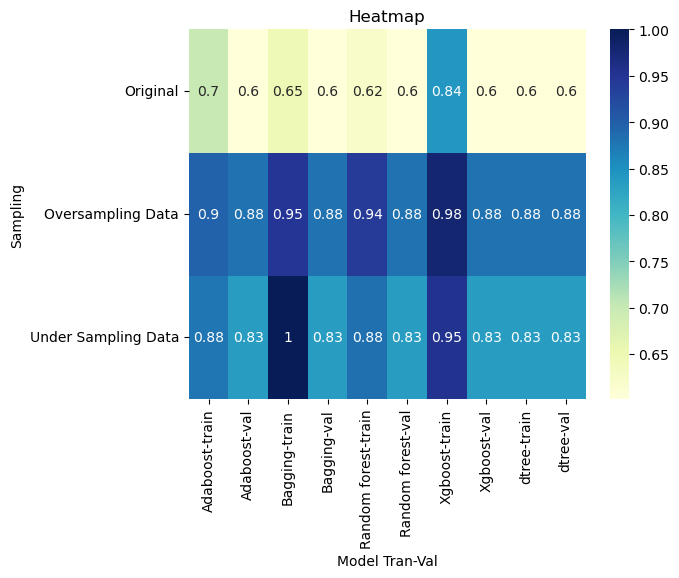

In [81]:
# show the collected model tuning data in a heatmap style for easy visualization (compare to table above)
heatmap_data = sorted_df.pivot_table(index='Sampling', columns=['ModelName', 'Type'], values='Recall Score')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.xlabel('Model Tran-Val')
plt.ylabel('Sampling')
plt.title('Heatmap')
plt.show()

# Business Insights and Conclusions

<span style="color:blue">
<h3>Recommendations<h3>
<li>To increase credit card business, customer must feel they are getting value inspite of the fees and high interest rates</li>
<li>To provide value, customer contacts should be increased, customer usage should be monitored, if the usage drops they eventually close the card</li>
<li>Monitor customers credit history and provide higher credit limit, attrition is higher for for lower credit limits</li>  
<li>Low Total_Revolving_Bal with possibly high total tran count (Total_Trans_Ct) leads to higher attrition, customers may be looking for lower fees or interest rates</li>
<li>Low change Total_Amt_Chng_Q4_Q1 with low total tran count leads to higher attrition</li>
<li>Very low or very high utilization leads to attrition, customers may not be using credit card due to fees and perhaps they are taking advantage of lower initial interest rate and once that scheme is gone they close the card, this needs further investigation</li>
<li>Higher the number of Total_Relationship_Count lower is the attrition rate, it is important that the customer thinks the bank is providing value rather than just the credit card</li>
<li>Increase contacts (Contacts_Count_12_mon) with the bank may imply customer statisfaction issues, please investigate and follow up with customers for frequent contacts</li>
<li>Increase inactivity in last 12 months (Months_Inactive_12_mon) with long tenured (Months_on_book) can cause attrition, these customers are not seeing value for their credit card, bank should provide incentive to increase card usage</li>
<li>Males with income less than 40k tend to close cards, perhaps this is an opportunity to sell personal loan to such customers</li>
<li>Higher the education higher the chance of attrition, these are well informed customers and perhaps have higher income, this card should be targeted to lower education levels</li>
<li>Married status seems to have no impact on attrition but higher dependent counts does lead to higher attrition</li>
<li>Very high income (80K-120K) or less than 40K tend to close the accounts, this could be due to high fees and interest rates</li>
</span>


***